# Reading the signals etc

In [77]:
import numpy as np
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.integrate import simps
from scipy.fft import fftshift
from tsfel.feature_extraction import features as tsfelf
import gpxpy 
import gpxpy.gpx 

In [78]:
from os import listdir
from os.path import isfile, join


In [79]:
def bpf(arr, fs, lf, hf, order):
    wbut = [lf, hf]
    bbut, abut = signal.butter(order, wbut, btype ='bandpass', fs = fs)

    return signal.filtfilt(bbut, abut, arr)

def hpf(arr, fs, lf, order):
    wbut = lf
    bbut, abut = signal.butter(order, wbut, btype ='highpass', fs =fs)

    return signal.filtfilt(bbut, abut, arr)


In [81]:
mypath = 'C:\\Users\\Owner\\Downloads\\CapstoneData\\10_Nov_2021_timestamps'
timestamps = [f for f in listdir(mypath) if isfile(join(mypath, f))]


In [82]:
mypath = 'C:\\Users\\Owner\\Downloads\\CapstoneData\\10_Nov_2021_gravel_and_wet_asphalt'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]


In [83]:
mypath = 'C:\\Users\\Owner\\Downloads\\CapstoneData\\22_Nov_2021_timestamps'
timestamps2 = [f for f in listdir(mypath) if isfile(join(mypath, f))]


In [84]:
mypath = 'C:\\Users\\Owner\\Downloads\\CapstoneData\\timestamps_13_1_2022'
timestamps3 = [f for f in listdir(mypath) if isfile(join(mypath, f))]

timestamps3

['start_13_01_2022_14_44_07_wet_asphalt.csv',
 'start_13_01_2022_14_51_06_ice.csv',
 'start_13_01_2022_14_56_08_ice.csv',
 'start_13_01_2022_14_57_06_ice.csv',
 'start_13_01_2022_14_57_41_ice.csv',
 'start_13_01_2022_14_58_54_ice.csv',
 'start_13_01_2022_15_00_08_ice.csv',
 'start_13_01_2022_15_00_39_wet_asphalt.csv',
 'stop_13_01_2022_14_49_27_wet_asphalt.csv',
 'stop_13_01_2022_14_51_43_ice.csv',
 'stop_13_01_2022_14_56_31_ice.csv',
 'stop_13_01_2022_14_57_37_ice.csv',
 'stop_13_01_2022_14_57_43_ice.csv',
 'stop_13_01_2022_14_59_41_ice.csv',
 'stop_13_01_2022_15_00_15_ice.csv',
 'stop_13_01_2022_15_04_05_wet_asphalt.csv']

In [85]:
wasp1_start = int('14_44_07')
wasp1_stop = int('14_49_27')

wasp2_start = int('15_00_39')
wasp2_stop = int('15_04_06')

ice1_start = int('14_51_06')
ice1_stop = int('14_51_43')

ice2_start = int('14_56_06')
ice2_stop = int('14_56_33')

ice3_start = int('14_57_04')
ice3_stop = int('14_57_43')

ice4_start = int('14_58_54')
ice4_stop = int('14_59_41')

ice5_start = int('15_00_04')
ice5_stop = int('15_00_16')



In [86]:
mypath = 'C:\\Users\\Owner\\Downloads\\CapstoneData\\13.01.2022'
onlyfiles3 = [f for f in listdir(mypath) if isfile(join(mypath, f))]

onlyfiles3

['2022_14_37_37-Jan-13.wav',
 '2022_14_37_47-Jan-13.wav',
 '2022_14_37_57-Jan-13.wav',
 '2022_14_38_07-Jan-13.wav',
 '2022_14_38_17-Jan-13.wav',
 '2022_14_38_28-Jan-13.wav',
 '2022_14_38_38-Jan-13.wav',
 '2022_14_38_48-Jan-13.wav',
 '2022_14_38_58-Jan-13.wav',
 '2022_14_39_08-Jan-13.wav',
 '2022_14_39_19-Jan-13.wav',
 '2022_14_39_29-Jan-13.wav',
 '2022_14_39_39-Jan-13.wav',
 '2022_14_39_49-Jan-13.wav',
 '2022_14_39_59-Jan-13.wav',
 '2022_14_40_10-Jan-13.wav',
 '2022_14_40_20-Jan-13.wav',
 '2022_14_40_30-Jan-13.wav',
 '2022_14_40_40-Jan-13.wav',
 '2022_14_40_50-Jan-13.wav',
 '2022_14_41_00-Jan-13.wav',
 '2022_14_41_11-Jan-13.wav',
 '2022_14_41_21-Jan-13.wav',
 '2022_14_41_31-Jan-13.wav',
 '2022_14_41_41-Jan-13.wav',
 '2022_14_41_51-Jan-13.wav',
 '2022_14_42_02-Jan-13.wav',
 '2022_14_42_12-Jan-13.wav',
 '2022_14_42_22-Jan-13.wav',
 '2022_14_42_32-Jan-13.wav',
 '2022_14_42_42-Jan-13.wav',
 '2022_14_42_53-Jan-13.wav',
 '2022_14_43_03-Jan-13.wav',
 '2022_14_43_13-Jan-13.wav',
 '2022_14_43_2

In [87]:
ice_files = []
wasp_files2 = []

for i in range(len(onlyfiles3)):
    test = onlyfiles3[i]
    if wasp1_start < int(test[5:13]) < wasp1_stop:
        wasp_files2.append(test)
    if wasp2_start < int(test[5:13]) < wasp2_stop:
        wasp_files2.append(test)

    
    # Add ice
    if ice1_start < int(test[5:13]) < ice1_stop:
        ice_files.append(test)
    if ice2_start < int(test[5:13]) < ice2_stop:
        ice_files.append(test)
    if ice3_start < int(test[5:13]) < ice3_stop:
        ice_files.append(test)
    if ice4_start < int(test[5:13]) < ice4_stop:
        ice_files.append(test)
    if ice5_start < int(test[5:13]) < ice5_stop:
        ice_files.append(test)

        
        

In [88]:
from tsfel.feature_extraction import features as tsfelf
import numpy as np
from scipy import signal

def hpf(arr, fs, lf, order):
    wbut = lf
    bbut, abut = signal.butter(order, wbut, btype ='highpass', fs =fs)

    return signal.filtfilt(bbut, abut, arr)
#the function is otherwise the same as in the ML_model folder but now the function returns a list
def get_features(sig):
    fs = 44100
    features = ["RMS", "RMS_filt", "Spectral_centroid", "Spectral_centroid_filt",\
                "Zero-Cross", "Zero-Cross_filt", "Spectral_slope", \
                    "Spectral_slope_filt", "Spectral_spread", \
                        "Spectral_spread_filt", "STD", "STD_filt"]

        
    s_f = hpf(sig, fs, 65, 2)
    RMS = tsfelf.rms(sig)
    RMS_filt= tsfelf.rms(s_f)
    
    Zero_Cross = tsfelf.zero_cross(sig)
    Zero_Cross_filt = tsfelf.zero_cross(s_f)
            
    Spectral_centroid = tsfelf.spectral_centroid(sig, fs)
    Spectral_centroid_filt = tsfelf.spectral_centroid(s_f, fs)
            
    Spectral_slope = tsfelf.spectral_slope(sig, fs)
    Spectral_slope_filt = tsfelf.spectral_slope(s_f, fs) 
            
    Spectral_spread = tsfelf.spectral_spread(sig, fs)
    Spectral_spread_filt = tsfelf.spectral_spread(s_f, fs) 
            
    STD = np.std(sig)
            
    STD_filt = np.std(s_f)

    return [RMS, RMS_filt, Zero_Cross, Zero_Cross_filt, Spectral_centroid, 
     Spectral_centroid_filt,Spectral_slope, Spectral_slope_filt, Spectral_spread, Spectral_spread_filt,  
      STD, STD_filt]

In [89]:
dasp_start1 = int('10_45_57')
dasp_stop1 = int('11_07_02')



gravel3_start = int('15_04_50')
gravel3_stop = int('15_08_07')
print(gravel3_stop)

wasp1_start = int('14_54_02')
wasp1_stop = int('14_59_34')

wasp2_start = int('14_59_48')
wasp2_stop = int('15_04_45')

wasp3_start = int('15_08_28')
wasp3_stop = int('15_11_24')

wasp4_start = int('15_13_38')
wasp4_stop = int('15_18_54')

150807


In [90]:
mypath = 'C:\\Users\\Owner\\Downloads\\CapstoneData\\22_Nov_2021_gravel_and_dry_asphalt'
onlyfiles2 = [f for f in listdir(mypath) if isfile(join(mypath, f))]


In [91]:

word = "gravel"
word2 ="dry_asphalt"

gravelstamps = []
dryasphaltstamps = []

for i in range(len(timestamps2)):
    sentence = timestamps2[i]
    if word in sentence.lower():
        gravelstamps.append(sentence)
    if word2 in sentence.lower():
        dryasphaltstamps.append(sentence)


In [92]:
dry_asphalt1_start = int('10_45_57')
dry_asphalt1_stop = int('10_50_40')

dry_asphalt2_start = int('10_52_49')
dry_asphalt2_stop = int('10_54_53')

dry_asphalt3_start = int('10_55_06')
dry_asphalt3_stop = int('10_56_39')

dry_asphalt4_start = int('10_56_49')
dry_asphalt4_stop = int('11_06_02')

dry_asphalt5_start = int('11_06_52')
dry_asphalt5_stop = int('11_08_28')

dry_asphalt6_start = int('11_14_41')
dry_asphalt6_stop = int('11_22_55')

dry_asphalt7_start = int('11_26_58')
dry_asphalt7_stop = int('11_31_26')

dry_asphalt8_start = int('11_36_04')
dry_asphalt8_stop = int('11_43_44')

dry_asphalt9_start = int('11_47_57')
dry_asphalt9_stop = int('12_00_59')

dry_asphalt10_start = int('12_01_05')
dry_asphalt10_stop = int('12_07_56')

dry_asphalt11_start = int('11_36_04')
dry_asphalt11_stop = int('12_08_41')

dry_asphalt12_start = int('12_00_59')
dry_asphalt12_stop = int('12_12_37')

In [93]:
gravel1_nov22_start = int('11_08_46')
gravel1_nov22_stop = int('11_14_33')


gravel2_nov22_start = int('11_23_03')
gravel2_nov22_stop = int('11_26_50')

gravel3_nov22_start = int('11_33_59')
gravel3_nov22_stop = int('11_35_55')

gravel4_nov22_start = int('11_43_56')
gravel4_nov22_stop = int('11_47_40')

In [94]:
stamp = gravelstamps[0][17:25]

In [95]:

gravel_files2 = []
dry_files = []

for i in range(len(onlyfiles2)):
    test = onlyfiles2[i]
    if gravel1_nov22_start < int(test[5:13]) < gravel1_nov22_stop:
        gravel_files2.append(test)
    if gravel2_nov22_start < int(test[5:13]) < gravel2_nov22_stop:
        gravel_files2.append(test)
    if gravel3_nov22_start < int(test[5:13]) < gravel3_nov22_stop:
        gravel_files2.append(test)
    if gravel4_nov22_start < int(test[5:13]) < gravel4_nov22_stop:
        gravel_files2.append(test)
    
    # Add dy asphalt files
    if dry_asphalt1_start < int(test[5:13]) < dry_asphalt1_stop:
        dry_files.append(test)
    if dry_asphalt2_start < int(test[5:13]) < dry_asphalt2_stop:
        dry_files.append(test)
    if dry_asphalt3_start < int(test[5:13]) < dry_asphalt3_stop:
        dry_files.append(test)
    if dry_asphalt4_start < int(test[5:13]) < dry_asphalt4_stop:
        dry_files.append(test)
    if dry_asphalt5_start < int(test[5:13]) < dry_asphalt5_stop:
        dry_files.append(test)
    if dry_asphalt6_start < int(test[5:13]) < dry_asphalt6_stop:
        dry_files.append(test)
    if dry_asphalt7_start < int(test[5:13]) < dry_asphalt7_stop:
        dry_files.append(test)
    if dry_asphalt8_start < int(test[5:13]) < dry_asphalt8_stop:
        dry_files.append(test)
    if dry_asphalt9_start < int(test[5:13]) < dry_asphalt9_stop:
        dry_files.append(test)
    if dry_asphalt10_start < int(test[5:13]) < dry_asphalt10_stop:
        dry_files.append(test)
    if dry_asphalt11_start < int(test[5:13]) < dry_asphalt11_stop:
        dry_files.append(test)
    if dry_asphalt12_start < int(test[5:13]) < dry_asphalt12_stop:
        dry_files.append(test)
        

In [96]:
dry_files

['2021_10_46_03-Nov-22.wav',
 '2021_10_46_18-Nov-22.wav',
 '2021_10_46_28-Nov-22.wav',
 '2021_10_46_37-Nov-22.wav',
 '2021_10_46_47-Nov-22.wav',
 '2021_10_46_56-Nov-22.wav',
 '2021_10_47_06-Nov-22.wav',
 '2021_10_47_16-Nov-22.wav',
 '2021_10_47_25-Nov-22.wav',
 '2021_10_47_35-Nov-22.wav',
 '2021_10_47_45-Nov-22.wav',
 '2021_10_47_54-Nov-22.wav',
 '2021_10_48_04-Nov-22.wav',
 '2021_10_48_13-Nov-22.wav',
 '2021_10_48_23-Nov-22.wav',
 '2021_10_48_33-Nov-22.wav',
 '2021_10_48_42-Nov-22.wav',
 '2021_10_48_52-Nov-22.wav',
 '2021_10_49_02-Nov-22.wav',
 '2021_10_49_11-Nov-22.wav',
 '2021_10_49_21-Nov-22.wav',
 '2021_10_49_30-Nov-22.wav',
 '2021_10_49_40-Nov-22.wav',
 '2021_10_49_50-Nov-22.wav',
 '2021_10_49_59-Nov-22.wav',
 '2021_10_50_09-Nov-22.wav',
 '2021_10_50_19-Nov-22.wav',
 '2021_10_50_28-Nov-22.wav',
 '2021_10_52_58-Nov-22.wav',
 '2021_10_53_08-Nov-22.wav',
 '2021_10_53_17-Nov-22.wav',
 '2021_10_53_27-Nov-22.wav',
 '2021_10_53_37-Nov-22.wav',
 '2021_10_53_46-Nov-22.wav',
 '2021_10_53_5

In [97]:
# Automatisoi tää
gravel1_start = int('14_49_48')
gravel1_stop = int('14_49_57')


gravel2_start = int('14_51_42')
gravel2_stop = int('14_53_28')

gravel3_start = int('15_04_50')
gravel3_stop = int('15_08_07')
print(gravel3_stop)

wasp1_start = int('14_54_02')
wasp1_stop = int('14_59_34')

wasp2_start = int('14_59_48')
wasp2_stop = int('15_04_45')

wasp3_start = int('15_08_28')
wasp3_stop = int('15_11_24')

wasp4_start = int('15_13_38')
wasp4_stop = int('15_18_54')


150807


In [98]:
test = onlyfiles[4]

gravel_files = []
wasp_files = []

for i in range(len(onlyfiles)):
    test = onlyfiles[i]
    if gravel2_start < int(test[5:13]) < gravel2_stop:
        gravel_files.append(test)
    if gravel3_start < int(test[5:13]) < gravel3_stop:
        gravel_files.append(test)
    
    # Add wet asphalt files
    if wasp1_start < int(test[5:13]) < wasp1_stop:
        wasp_files.append(test)
    if wasp2_start < int(test[5:13]) < wasp2_stop:
        wasp_files.append(test)
    if wasp3_start < int(test[5:13]) < wasp3_stop:
        wasp_files.append(test)
    if wasp4_start < int(test[5:13]) < wasp4_stop:
        wasp_files.append(test)        
        

In [99]:
fs = 44100
def read_data(r_id):
    link = 'C:\\Users\\Owner\\Downloads\\CapstoneData\\10_Nov_2021_gravel_and_wet_asphalt\\'+ str(r_id)
    sr, data = wavfile.read(link)
    return data
def read_data2(r_id):
    link = 'C:\\Users\\Owner\\Downloads\\CapstoneData\\22_Nov_2021_gravel_and_dry_asphalt\\'+ str(r_id)
    sr, data = wavfile.read(link)
    return data

def read_data3(r_id):
    link = 'C:\\Users\\Owner\\Downloads\\CapstoneData\\13.01.2022\\'+ str(r_id)
    sr, data = wavfile.read(link)
    return data

def read_timestamps(r_id):
    link = 'C:\\Users\\Owner\\Downloads\\CapstoneData\\10_Nov_2021_timestamps\\'+ str(r_id)
    time = pd.read_csv(link)
    return time


In [100]:
s = read_data2('2021_10_47_35-Nov-22.wav')

len(s)

409600

## Extracting features from the signals

In [127]:
def get_features(data, surface):
    columns = ["Surface"]
    features = ["RMS", "RMS_filt", "Zero-Cross", "Zero-Cross_filt", "Spectral_centroid", "Spectral_centroid_filt", "Spectral_slope", "Spectral_slope_filt","Spectral_spread", "Spectral_spread_filt", "STD", "STD_filt"] 

    df = pd.DataFrame(columns = columns)
    for i in range(len(data)):
        r_id = data[i]
        df.loc[i, "ID"] = r_id
        df.loc[i, "Surface"] = surface
        
        #Read the signals
        sig = read_data(r_id)
        
        s_f = hpf(sig, fs, 65, 2)
        df.loc[i, "RMS"] = tsfelf.rms(sig)
        df.loc[i, "RMS_filt"] = tsfelf.rms(s_f)

        df.loc[i, "Zero-Cross"] = tsfelf.zero_cross(sig)
        df.loc[i, "Zero-Cross_filt"] = tsfelf.zero_cross(s_f)
        
        df.loc[i, "Spectral_centroid"] = tsfelf.spectral_centroid(sig, fs)
        df.loc[i, "Spectral_centroid_filt"] = tsfelf.spectral_centroid(s_f, fs)
        
        df.loc[i, "Spectral_slope"] = tsfelf.spectral_slope(sig, fs)
        df.loc[i, "Spectral_slope_filt"] = tsfelf.spectral_slope(s_f, fs) 
        
        df.loc[i, "Spectral_spread"] = tsfelf.spectral_spread(sig, fs)
        df.loc[i, "Spectral_spread_filt"] = tsfelf.spectral_spread(s_f, fs) 
        
        df.loc[i, "STD"] = np.std(sig)
        
        df.loc[i, "STD_filt"] = np.std(s_f)
        
        print(i, end=',')
    return df, features
        

In [102]:

waspdf, features = get_features(wasp_files, "Wet Asphalt")

graveldf, _ = get_features(gravel_files, "Wet Gravel")



0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,

C:\Users\Owner\anaconda3\lib\site-packages\tsfel\feature_extraction\features.py:674: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.sum(np.array(signal) ** 2) / len(signal))


0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,

In [103]:
def get_features2(data, surface):
    columns = ["Surface"]
    features = ["RMS", "RMSf", "Spec", "Specf", "ZC", "ZCf", "Specslo", "Specslof", "Specspr", "Specsprf", "STD", "STDf"]

    df = pd.DataFrame(columns = columns)
    for i in range(len(data)):
        r_id = data[i]
        df.loc[i, "ID"] = r_id
        df.loc[i, "Surface"] = surface
        #Read the signals
        sig = read_data2(r_id)
        
        s_f = hpf(sig, fs, 65, 2)
        df.loc[i, "RMS"] = tsfelf.rms(sig)
        df.loc[i, "RMS_filt"] = tsfelf.rms(s_f)

        df.loc[i, "Zero-Cross"] = tsfelf.zero_cross(sig)
        df.loc[i, "Zero-Cross_filt"] = tsfelf.zero_cross(s_f)
        
        df.loc[i, "Spectral_centroid"] = tsfelf.spectral_centroid(sig, fs)
        df.loc[i, "Spectral_centroid_filt"] = tsfelf.spectral_centroid(s_f, fs)
        
        df.loc[i, "Spectral_slope"] = tsfelf.spectral_slope(sig, fs)
        df.loc[i, "Spectral_slope_filt"] = tsfelf.spectral_slope(s_f, fs) 
        
        df.loc[i, "Spectral_spread"] = tsfelf.spectral_spread(sig, fs)
        df.loc[i, "Spectral_spread_filt"] = tsfelf.spectral_spread(s_f, fs) 
        
        df.loc[i, "STD"] = np.std(sig)
        
        df.loc[i, "STD_filt"] = np.std(s_f)
        
        print(i, end=',')
    return df, features
        

In [104]:
graveldf2, _ = get_features2(gravel_files2, "Dry Gravel")

drydf, _ = get_features2(dry_files, "Dry Asphalt")

0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,

In [105]:
def get_features3(data, surface):
    columns = ["Surface"]
    features = ["RMS", "RMSf", "Spec", "Specf", "ZC", "ZCf", "Specslo", "Specslof", "Specspr", "Specsprf", "STD", "STDf"]

    df = pd.DataFrame(columns = columns)
    for i in range(len(data)):
        r_id = data[i]
        df.loc[i, "ID"] = r_id
        df.loc[i, "Surface"] = surface
        #Read the signals
        sig = read_data3(r_id)
        
        s_f = hpf(sig, fs, 65, 2)
        df.loc[i, "RMS"] = tsfelf.rms(sig)
        df.loc[i, "RMS_filt"] = tsfelf.rms(s_f)

        df.loc[i, "Zero-Cross"] = tsfelf.zero_cross(sig)
        df.loc[i, "Zero-Cross_filt"] = tsfelf.zero_cross(s_f)
        
        df.loc[i, "Spectral_centroid"] = tsfelf.spectral_centroid(sig, fs)
        df.loc[i, "Spectral_centroid_filt"] = tsfelf.spectral_centroid(s_f, fs)
        
        df.loc[i, "Spectral_slope"] = tsfelf.spectral_slope(sig, fs)
        df.loc[i, "Spectral_slope_filt"] = tsfelf.spectral_slope(s_f, fs) 
        
        df.loc[i, "Spectral_spread"] = tsfelf.spectral_spread(sig, fs)
        df.loc[i, "Spectral_spread_filt"] = tsfelf.spectral_spread(s_f, fs) 
        
        df.loc[i, "STD"] = np.std(sig)
        
        df.loc[i, "STD_filt"] = np.std(s_f)
        
        print(i, end=',')
    return df, features
        

In [107]:
icedf, _ = get_features3(ice_files, "Ice")
waspdf2, _ = get_features3(wasp_files2, "Wet Asphalt")



0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,

In [109]:
waspdf2

Surface                        ID        RMS      RMS_filt  \
0   Wet Asphalt  2022_14_44_14-Jan-13.wav  19.868353   1761.138213   
1   Wet Asphalt  2022_14_44_24-Jan-13.wav  17.254955   2035.841568   
2   Wet Asphalt  2022_14_44_35-Jan-13.wav  16.814893   2076.510367   
3   Wet Asphalt  2022_14_44_45-Jan-13.wav  16.944965   2066.260508   
4   Wet Asphalt  2022_14_44_55-Jan-13.wav  16.604110   2289.283013   
5   Wet Asphalt  2022_14_45_05-Jan-13.wav  14.825308   2190.986856   
6   Wet Asphalt  2022_14_45_15-Jan-13.wav  17.038128   2189.927366   
7   Wet Asphalt  2022_14_45_26-Jan-13.wav  15.502651   2280.766751   
8   Wet Asphalt  2022_14_45_36-Jan-13.wav  17.028682   2233.659746   
9   Wet Asphalt  2022_14_45_46-Jan-13.wav        NaN  10288.681596   
10  Wet Asphalt  2022_14_45_56-Jan-13.wav        NaN   9743.687948   
11  Wet Asphalt  2022_14_46_06-Jan-13.wav   0.474524   8211.086852   
12  Wet Asphalt  2022_14_46_17-Jan-13.wav        NaN   9523.871431   
13  Wet Asphalt  2022_14_46_27-Jan-13.wav        NaN   9443.003731   
14  Wet Asphalt  2022_14_46_37-Jan-13.wav        NaN   9086.455515   
15  Wet Asphalt  2022_14_46_47-Jan-13.wav        NaN   8517.722631   
16  Wet Asphalt  2022_14_46_57-Jan-13.wav   6.910680   7234.603896   
17  Wet Asphalt  2022_14_47_07-Jan-13.wav  20.744088   1636.325934   
18  Wet Asphalt  2022_14_47_18-Jan-13.wav  27.779183   1071.077594   
19  Wet Asphalt  2022_14_47_28-Jan-13.wav  37.311860    684.693485   
20  Wet Asphalt  2022_14_47_38-Jan-13.wav  31.566320    836.682515   
21  Wet Asphalt  2022_14_47_48-Jan-13.wav  28.667072    959.435102   
22  Wet Asphalt  2022_14_47_58-Jan-13.wav  27.093964   1076.909020   
23  Wet Asphalt  2022_14_48_09-Jan-13.wav  26.688786   1017.629342   
24  Wet Asphalt  2022_14_48_19-Jan-13.wav  26.292896   1107.193026   
25  Wet Asphalt  2022_14_48_29-Jan-13.wav  30.111652    910.913318   
26  Wet Asphalt  2022_14_48_39-Jan-13.wav  58.002563    334.734678   
27  Wet Asphalt  2022_14_48_49-Jan-13.wav  55.229747    264.411782   
28  Wet Asphalt  2022_14_49_00-Jan-13.wav  33.755041    653.256155   
29  Wet Asphalt  2022_14_49_10-Jan-13.wav  30.074151    832.245989   
30  Wet Asphalt  2022_14_49_20-Jan-13.wav  28.936220    919.124639   
31  Wet Asphalt  2022_15_00_45-Jan-13.wav  44.962119    412.827105   
32  Wet Asphalt  2022_15_00_55-Jan-13.wav  41.186323    476.595254   
33  Wet Asphalt  2022_15_01_05-Jan-13.wav  40.335747    479.506385   
34  Wet Asphalt  2022_15_01_15-Jan-13.wav  38.906022    509.437326   
35  Wet Asphalt  2022_15_01_26-Jan-13.wav  38.398235    536.000730   
36  Wet Asphalt  2022_15_01_36-Jan-13.wav  31.278557    909.155444   
37  Wet Asphalt  2022_15_01_46-Jan-13.wav  29.302412    894.883914   
38  Wet Asphalt  2022_15_01_56-Jan-13.wav  28.817549    974.214105   
39  Wet Asphalt  2022_15_02_06-Jan-13.wav  27.609070    996.550720   
40  Wet Asphalt  2022_15_02_17-Jan-13.wav  28.305091    961.182367   
41  Wet Asphalt  2022_15_02_27-Jan-13.wav  28.343001    961.037995   
42  Wet Asphalt  2022_15_02_37-Jan-13.wav  28.371234    988.810958   
43  Wet Asphalt  2022_15_02_47-Jan-13.wav  29.673804    936.057756   
44  Wet Asphalt  2022_15_02_57-Jan-13.wav  28.666365    955.112735   
45  Wet Asphalt  2022_15_03_08-Jan-13.wav  29.856172    935.064100   
46  Wet Asphalt  2022_15_03_18-Jan-13.wav  32.955746    760.687234   
47  Wet Asphalt  2022_15_03_28-Jan-13.wav  34.228158    694.623322   
48  Wet Asphalt  2022_15_03_38-Jan-13.wav  35.031203    674.327265   
49  Wet Asphalt  2022_15_03_48-Jan-13.wav  35.212853    645.189176   
50  Wet Asphalt  2022_15_03_59-Jan-13.wav  34.046752    689.591627   

    Zero-Cross  Zero-Cross_filt  Spectral_centroid  Spectral_centroid_filt  \
0      10164.0          12160.0         909.536346             1022.183839   
1      10025.0          12182.0         738.359058              847.431600   
2       9112.0          11231.0         707.682136              838.236648   
3       9217.0          11567.0         730.957167     

In [108]:
#Adding all of the dataframes together.

alldf = pd.concat([waspdf, graveldf, graveldf2, drydf, icedf, waspdf2])

alldf

Surface                        ID        RMS     RMS_filt  Zero-Cross  \
0   Wet Asphalt  2021_14_54_08-Nov-10.wav  29.546131  1023.227026      7470.0   
1   Wet Asphalt  2021_14_54_18-Nov-10.wav  23.158067  1283.379764      8372.0   
2   Wet Asphalt  2021_14_54_28-Nov-10.wav  22.356680  1559.749380      9023.0   
3   Wet Asphalt  2021_14_54_39-Nov-10.wav  18.413845  1917.039422      8206.0   
4   Wet Asphalt  2021_14_54_49-Nov-10.wav  17.320115  1903.750157      7371.0   
..          ...                       ...        ...          ...         ...   
46  Wet Asphalt  2022_15_03_18-Jan-13.wav  32.955746   760.687234     11694.0   
47  Wet Asphalt  2022_15_03_28-Jan-13.wav  34.228158   694.623322     12092.0   
48  Wet Asphalt  2022_15_03_38-Jan-13.wav  35.031203   674.327265     11464.0   
49  Wet Asphalt  2022_15_03_48-Jan-13.wav  35.212853   645.189176     12318.0   
50  Wet Asphalt  2022_15_03_59-Jan-13.wav  34.046752   689.591627     12645.0   

    Zero-Cross_filt  Spectral_centroid  Spectral_centroid_filt  \
0            8387.0         936.116277             1018.407771   
1            9884.0         869.158982              980.920178   
2           10466.0         978.265482             1050.050716   
3            9659.0         868.511381              999.818919   
4            9141.0         845.770818              980.018609   
..              ...                ...                     ...   
46          12483.0         843.351790              902.059749   
47          12923.0        1000.020771             1069.588814   
48          12298.0        1143.012702             1235.747091   
49          13012.0        1151.374254             1225.757994   
50          13448.0        1045.527700             1128.502778   

    Spectral_slope  Spectral_slope_filt  Spectral_spread  \
0    -1.136291e-09        -1.127022e-09      1641.800213   
1    -1.143832e-09        -1.131245e-09      1428.056723   
2    -1.131544e-09        -1.123459e-09      1688.413169   
3    -1.143905e-09        -1.129116e-09      1434.742860   
4    -1.146466e-09        -1.131346e-09      1441.429068   
..             ...                  ...              ...   
46   -1.146739e-09        -1.140126e-09      1241.290504   
47   -1.129093e-09        -1.121258e-09      1596.126302   
48   -1.112988e-09        -1.102544e-09      1802.616169   
49   -1.112047e-09        -1.103669e-09      1786.328591   
50   -1.123968e-09        -1.114623e-09      1495.774882   

    Spectral_spread_filt          STD     STD_filt  
0            1592.380153  1165.214212  1023.227026  
1            1453.218214  1536.434588  1283.379763  
2            1527.067657  1827.613507  1559.749375  
3            1557.996016  2310.517279  1917.039352  
4            1511.096731  2390.523797  1903.750146  
..                   ...          ...          ...  
46           1192.659815   840.988779   760.687232  
47           1572.647560   769.444235   694.623319  
48           1842.818722   749.333964   674.327260  
49           1767.301932   710.715138   645.189172  
50           1530.716595   762.462107   689.591616  

[970 rows x 14 columns]

In [110]:
alldf.to_csv(r'C:\\Users\\Owner\\Downloads\\CapstoneData\\DataFrame_17_01.csv', index = False)

# Data analysis. 

### Different surfaces and their features boxplotted.

<IPython.core.display.Javascript object>


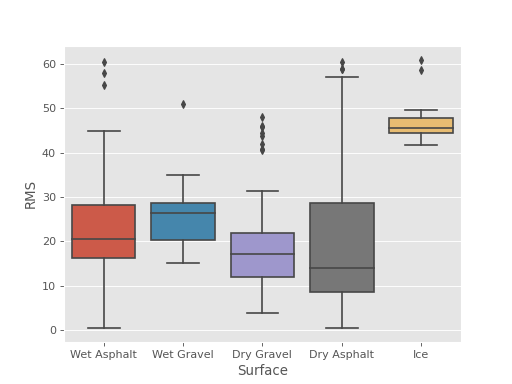

In [114]:
fig = sns.boxplot(data=alldf, x="Surface", y="RMS")

<IPython.core.display.Javascript object>


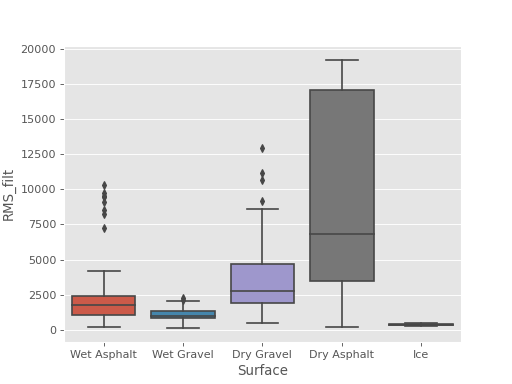

In [115]:
plt.figure()
fig = sns.boxplot(data=alldf, x="Surface", y="RMS_filt")

<IPython.core.display.Javascript object>


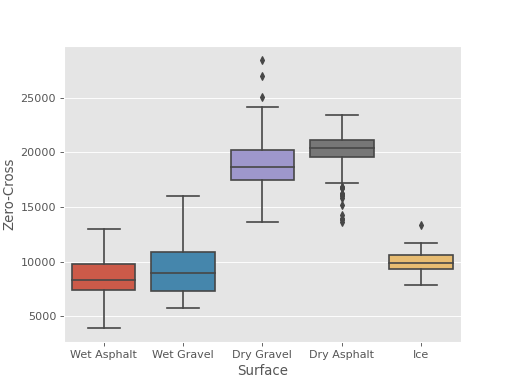

In [116]:
plt.figure()
fig = sns.boxplot(data=alldf, x="Surface", y="Zero-Cross")

<IPython.core.display.Javascript object>


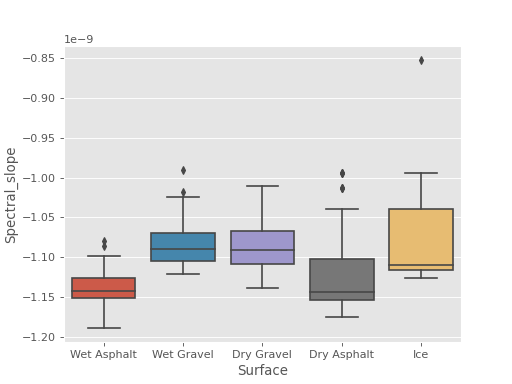

In [117]:
plt.figure()
fig = sns.boxplot(data=alldf, x="Surface", y="Spectral_slope")

<IPython.core.display.Javascript object>


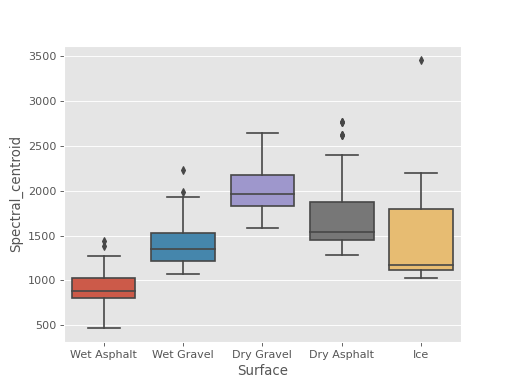

In [118]:
plt.figure()
fig = sns.boxplot(data=alldf, x="Surface", y="Spectral_centroid")

<IPython.core.display.Javascript object>


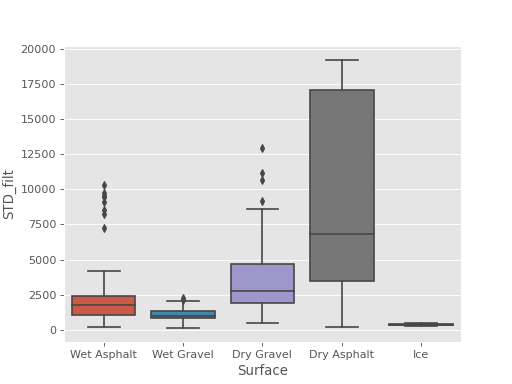

In [121]:
plt.figure()
fig = sns.boxplot(data=alldf, x="Surface", y="STD_filt")

In [122]:
alldf

Surface                        ID        RMS     RMS_filt  Zero-Cross  \
0   Wet Asphalt  2021_14_54_08-Nov-10.wav  29.546131  1023.227026      7470.0   
1   Wet Asphalt  2021_14_54_18-Nov-10.wav  23.158067  1283.379764      8372.0   
2   Wet Asphalt  2021_14_54_28-Nov-10.wav  22.356680  1559.749380      9023.0   
3   Wet Asphalt  2021_14_54_39-Nov-10.wav  18.413845  1917.039422      8206.0   
4   Wet Asphalt  2021_14_54_49-Nov-10.wav  17.320115  1903.750157      7371.0   
..          ...                       ...        ...          ...         ...   
46  Wet Asphalt  2022_15_03_18-Jan-13.wav  32.955746   760.687234     11694.0   
47  Wet Asphalt  2022_15_03_28-Jan-13.wav  34.228158   694.623322     12092.0   
48  Wet Asphalt  2022_15_03_38-Jan-13.wav  35.031203   674.327265     11464.0   
49  Wet Asphalt  2022_15_03_48-Jan-13.wav  35.212853   645.189176     12318.0   
50  Wet Asphalt  2022_15_03_59-Jan-13.wav  34.046752   689.591627     12645.0   

    Zero-Cross_filt  Spectral_centroid  Spectral_centroid_filt  \
0            8387.0         936.116277             1018.407771   
1            9884.0         869.158982              980.920178   
2           10466.0         978.265482             1050.050716   
3            9659.0         868.511381              999.818919   
4            9141.0         845.770818              980.018609   
..              ...                ...                     ...   
46          12483.0         843.351790              902.059749   
47          12923.0        1000.020771             1069.588814   
48          12298.0        1143.012702             1235.747091   
49          13012.0        1151.374254             1225.757994   
50          13448.0        1045.527700             1128.502778   

    Spectral_slope  Spectral_slope_filt  Spectral_spread  \
0    -1.136291e-09        -1.127022e-09      1641.800213   
1    -1.143832e-09        -1.131245e-09      1428.056723   
2    -1.131544e-09        -1.123459e-09      1688.413169   
3    -1.143905e-09        -1.129116e-09      1434.742860   
4    -1.146466e-09        -1.131346e-09      1441.429068   
..             ...                  ...              ...   
46   -1.146739e-09        -1.140126e-09      1241.290504   
47   -1.129093e-09        -1.121258e-09      1596.126302   
48   -1.112988e-09        -1.102544e-09      1802.616169   
49   -1.112047e-09        -1.103669e-09      1786.328591   
50   -1.123968e-09        -1.114623e-09      1495.774882   

    Spectral_spread_filt          STD     STD_filt  
0            1592.380153  1165.214212  1023.227026  
1            1453.218214  1536.434588  1283.379763  
2            1527.067657  1827.613507  1559.749375  
3            1557.996016  2310.517279  1917.039352  
4            1511.096731  2390.523797  1903.750146  
..                   ...          ...          ...  
46           1192.659815   840.988779   760.687232  
47           1572.647560   769.444235   694.623319  
48           1842.818722   749.333964   674.327260  
49           1767.301932   710.715138   645.189172  
50           1530.716595   762.462107   689.591616  

[970 rows x 14 columns]

# MACHINE LEARNING PART

### This time I split the gravel instances into two: wet and dry.


In [123]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import sklearn
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import recall_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import preprocessing
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

In [124]:
features

['RMS',
 'RMSf',
 'Spec',
 'Specf',
 'ZC',
 'ZCf',
 'Specslo',
 'Specslof',
 'Specspr',
 'Specsprf',
 'STD',
 'STDf']

In [125]:
fts=['RMS',
 'RMSf',
 'Spec',
 'Specf',
 'ZC',
 'ZCf',
 'Specslo',
 'Specslof',
 'Specspr',
 'Specsprf',
 'STD',
 'STDf',
'Surface']

In [229]:
graveldf2["Surface"] = "DryGrav"

graveldf["Surface"] = "WetGrav"

waspdf["Surface"] = "WetAsp"

drydf["Surface"] = "DryAsp"

In [230]:
graveldf22 = graveldf2[fts]

graveldf12 = graveldf[fts]

waspdf2 = waspdf[fts]

drydf2 = drydf[fts]

In [231]:
tdrydf2 = drydf2.dropna()

tdrydf2 = tdrydf2[0:105]

alldf = pd.concat([waspdf, graveldf, graveldf2, tdrydf])

alldf = pd.concat([waspdf2, graveldf12, graveldf22, tdrydf2])

alldf

RMS         RMSf         Spec        Specf       ZC      ZCf  \
0    29.546131  1023.227026   936.116277  1018.407771   7470.0   8387.0   
1    23.158067  1283.379764   869.158982   980.920178   8372.0   9884.0   
2    22.356680  1559.749380   978.265482  1050.050716   9023.0  10466.0   
3    18.413845  1917.039422   868.511381   999.818919   8206.0   9659.0   
4    17.320115  1903.750157   845.770818   980.018609   7371.0   9141.0   
..         ...          ...          ...          ...      ...      ...   
149   8.015358  5411.595677  1411.974206  1464.138470  20532.0  21396.0   
150  10.389646  5148.698010  1426.624362  1482.212794  21115.0  22032.0   
151   5.727104  5511.432614  1430.342826  1484.987545  21158.0  22068.0   
153   6.959138  5811.278444  1409.120273  1476.886269  20752.0  21879.0   
154   7.940663  4603.270370  1449.444357  1511.847038  20834.0  22208.0   

          Specslo      Specslof      Specspr     Specsprf          STD  \
0   -1.136291e-09 -1.127022e-09  1641.800213  1592.380153  1165.214212   
1   -1.143832e-09 -1.131245e-09  1428.056723  1453.218214  1536.434588   
2   -1.131544e-09 -1.123459e-09  1688.413169  1527.067657  1827.613507   
3   -1.143905e-09 -1.129116e-09  1434.742860  1557.996016  2310.517279   
4   -1.146466e-09 -1.131346e-09  1441.429068  1511.096731  2390.523797   
..            ...           ...          ...          ...          ...   
149 -1.158484e-09 -1.152197e-09  1508.710934  1467.133287  5686.370703   
150 -1.156718e-09 -1.150019e-09  1534.212795  1505.584996  5419.202908   
151 -1.156270e-09 -1.149685e-09  1515.618864  1462.701347  5806.613661   
153 -1.158828e-09 -1.150661e-09  1494.198522  1514.366795  6142.207515   
154 -1.153968e-09 -1.146448e-09  1573.830404  1522.523202  4921.942283   

            STDf Surface  
0    1023.227026  WetAsp  
1    1283.379763  WetAsp  
2    1559.749375  WetAsp  
3    1917.039352  WetAsp  
4    1903.750146  WetAsp  
..           ...     ...  
149  5411.595274  DryAsp  
150  5148.697873  DryAsp  
151  5511.432586  DryAsp  
153  5811.278346  DryAsp  
154  4603.270179  DryAsp  

[316 rows x 13 columns]

In [131]:
alldf

Surface                        ID        RMS     RMS_filt  Zero-Cross  \
0   Wet Asphalt  2021_14_54_08-Nov-10.wav  29.546131  1023.227026      7470.0   
1   Wet Asphalt  2021_14_54_18-Nov-10.wav  23.158067  1283.379764      8372.0   
2   Wet Asphalt  2021_14_54_28-Nov-10.wav  22.356680  1559.749380      9023.0   
3   Wet Asphalt  2021_14_54_39-Nov-10.wav  18.413845  1917.039422      8206.0   
4   Wet Asphalt  2021_14_54_49-Nov-10.wav  17.320115  1903.750157      7371.0   
..          ...                       ...        ...          ...         ...   
46  Wet Asphalt  2022_15_03_18-Jan-13.wav  32.955746   760.687234     11694.0   
47  Wet Asphalt  2022_15_03_28-Jan-13.wav  34.228158   694.623322     12092.0   
48  Wet Asphalt  2022_15_03_38-Jan-13.wav  35.031203   674.327265     11464.0   
49  Wet Asphalt  2022_15_03_48-Jan-13.wav  35.212853   645.189176     12318.0   
50  Wet Asphalt  2022_15_03_59-Jan-13.wav  34.046752   689.591627     12645.0   

    Zero-Cross_filt  Spectral_centroid  Spectral_centroid_filt  \
0            8387.0         936.116277             1018.407771   
1            9884.0         869.158982              980.920178   
2           10466.0         978.265482             1050.050716   
3            9659.0         868.511381              999.818919   
4            9141.0         845.770818              980.018609   
..              ...                ...                     ...   
46          12483.0         843.351790              902.059749   
47          12923.0        1000.020771             1069.588814   
48          12298.0        1143.012702             1235.747091   
49          13012.0        1151.374254             1225.757994   
50          13448.0        1045.527700             1128.502778   

    Spectral_slope  Spectral_slope_filt  Spectral_spread  \
0    -1.136291e-09        -1.127022e-09      1641.800213   
1    -1.143832e-09        -1.131245e-09      1428.056723   
2    -1.131544e-09        -1.123459e-09      1688.413169   
3    -1.143905e-09        -1.129116e-09      1434.742860   
4    -1.146466e-09        -1.131346e-09      1441.429068   
..             ...                  ...              ...   
46   -1.146739e-09        -1.140126e-09      1241.290504   
47   -1.129093e-09        -1.121258e-09      1596.126302   
48   -1.112988e-09        -1.102544e-09      1802.616169   
49   -1.112047e-09        -1.103669e-09      1786.328591   
50   -1.123968e-09        -1.114623e-09      1495.774882   

    Spectral_spread_filt          STD     STD_filt  
0            1592.380153  1165.214212  1023.227026  
1            1453.218214  1536.434588  1283.379763  
2            1527.067657  1827.613507  1559.749375  
3            1557.996016  2310.517279  1917.039352  
4            1511.096731  2390.523797  1903.750146  
..                   ...          ...          ...  
46           1192.659815   840.988779   760.687232  
47           1572.647560   769.444235   694.623319  
48           1842.818722   749.333964   674.327260  
49           1767.301932   710.715138   645.189172  
50           1530.716595   762.462107   689.591616  

[638 rows x 14 columns]

In [132]:
features = ["RMS", "RMS_filt", "Zero-Cross", "Zero-Cross_filt", "Spectral_centroid", "Spectral_centroid_filt", "Spectral_slope", "Spectral_slope_filt","Spectral_spread", "Spectral_spread_filt", "STD", "STD_filt"] 

In [133]:

# post processing, standardize the data

#remove na values
alldf = alldf.dropna()

scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object

#with these 3 features only, we can get almost perfect score...

alldf[features] = scaler.fit_transform(alldf[features])

alldf

Surface                        ID       RMS  RMS_filt  Zero-Cross  \
0   Wet Asphalt  2021_14_54_08-Nov-10.wav  0.545721 -0.839738   -1.648112   
1   Wet Asphalt  2021_14_54_18-Nov-10.wav  0.096945 -0.724420   -1.482442   
2   Wet Asphalt  2021_14_54_28-Nov-10.wav  0.040645 -0.601915   -1.362874   
3   Wet Asphalt  2021_14_54_39-Nov-10.wav -0.236348 -0.443540   -1.512931   
4   Wet Asphalt  2021_14_54_49-Nov-10.wav -0.313185 -0.449431   -1.666295   
..          ...                       ...       ...       ...         ...   
46  Wet Asphalt  2022_15_03_18-Jan-13.wav  0.785254 -0.956113   -0.872294   
47  Wet Asphalt  2022_15_03_28-Jan-13.wav  0.874644 -0.985397   -0.799194   
48  Wet Asphalt  2022_15_03_38-Jan-13.wav  0.931060 -0.994393   -0.914538   
49  Wet Asphalt  2022_15_03_48-Jan-13.wav  0.943822 -1.007309   -0.757685   
50  Wet Asphalt  2022_15_03_59-Jan-13.wav  0.861900 -0.987627   -0.697625   

    Zero-Cross_filt  Spectral_centroid  Spectral_centroid_filt  \
0         -1.808955          -1.263336               -1.272075   
1         -1.522489          -1.417506               -1.357346   
2         -1.411117          -1.166288               -1.200098   
3         -1.565545          -1.418997               -1.314358   
4         -1.664669          -1.471357               -1.359397   
..              ...                ...                     ...   
46        -1.025144          -1.476927               -1.536726   
47        -0.940946          -1.116196               -1.155656   
48        -1.060546          -0.786956               -0.777704   
49        -0.923915          -0.767704               -0.800426   
50        -0.840482          -1.011416               -1.021647   

    Spectral_slope  Spectral_slope_filt  Spectral_spread  \
0        -0.295158            -0.312909        -0.594772   
1        -0.497311            -0.417539        -1.024456   
2        -0.167904            -0.224592        -0.501067   
3        -0.499266            -0.364792        -1.011015   
4        -0.567923            -0.420056        -0.997574   
..             ...                  ...              ...   
46       -0.575227            -0.637643        -1.399908   
47       -0.102222            -0.170060        -0.686589   
48        0.329490             0.293698        -0.271487   
49        0.354735             0.265818        -0.304229   
50        0.035170            -0.005627        -0.888323   

    Spectral_spread_filt       STD  STD_filt  
0              -0.672487 -0.856241 -0.839738  
1              -0.942063 -0.699120 -0.724420  
2              -0.799006 -0.575877 -0.601915  
3              -0.739094 -0.371485 -0.443540  
4              -0.829944 -0.337622 -0.449431  
..                   ...       ...       ...  
46             -1.446800 -0.993471 -0.956113  
47             -0.710712 -1.023753 -0.985397  
48             -0.187353 -1.032265 -0.994393  
49             -0.333640 -1.048610 -1.007309  
50             -0.791938 -1.026708 -0.987627  

[638 rows x 14 columns]

In [134]:
X = alldf[features]
y = alldf["Surface"]

X

RMS  RMS_filt  Zero-Cross  Zero-Cross_filt  Spectral_centroid  \
0   0.545721 -0.839738   -1.648112        -1.808955          -1.263336   
1   0.096945 -0.724420   -1.482442        -1.522489          -1.417506   
2   0.040645 -0.601915   -1.362874        -1.411117          -1.166288   
3  -0.236348 -0.443540   -1.512931        -1.565545          -1.418997   
4  -0.313185 -0.449431   -1.666295        -1.664669          -1.471357   
..       ...       ...         ...              ...                ...   
46  0.785254 -0.956113   -0.872294        -1.025144          -1.476927   
47  0.874644 -0.985397   -0.799194        -0.940946          -1.116196   
48  0.931060 -0.994393   -0.914538        -1.060546          -0.786956   
49  0.943822 -1.007309   -0.757685        -0.923915          -0.767704   
50  0.861900 -0.987627   -0.697625        -0.840482          -1.011416   

    Spectral_centroid_filt  Spectral_slope  Spectral_slope_filt  \
0                -1.272075       -0.295158            -0.312909   
1                -1.357346       -0.497311            -0.417539   
2                -1.200098       -0.167904            -0.224592   
3                -1.314358       -0.499266            -0.364792   
4                -1.359397       -0.567923            -0.420056   
..                     ...             ...                  ...   
46               -1.536726       -0.575227            -0.637643   
47               -1.155656       -0.102222            -0.170060   
48               -0.777704        0.329490             0.293698   
49               -0.800426        0.354735             0.265818   
50               -1.021647        0.035170            -0.005627   

    Spectral_spread  Spectral_spread_filt       STD  STD_filt  
0         -0.594772             -0.672487 -0.856241 -0.839738  
1         -1.024456             -0.942063 -0.699120 -0.724420  
2         -0.501067             -0.799006 -0.575877 -0.601915  
3         -1.011015             -0.739094 -0.371485 -0.443540  
4         -0.997574             -0.829944 -0.337622 -0.449431  
..              ...                   ...       ...       ...  
46        -1.399908             -1.446800 -0.993471 -0.956113  
47        -0.686589             -0.710712 -1.023753 -0.985397  
48        -0.271487             -0.187353 -1.032265 -0.994393  
49        -0.304229             -0.333640 -1.048610 -1.007309  
50        -0.888323             -0.791938 -1.026708 -0.987627  

[638 rows x 12 columns]

In [135]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True, stratify=None)

x_train

RMS  RMS_filt  Zero-Cross  Zero-Cross_filt  Spectral_centroid  \
324 -1.053658  0.783743    0.471795         0.642174           0.756386   
633  2.048844 -1.178966    0.656382         1.062018           1.171059   
664  1.036659 -0.899471    1.126024         1.084790           0.533291   
149 -0.966866  1.105482    0.750972         0.680446          -0.167671   
22  -0.065012 -0.600501   -1.315487        -1.366148          -1.344987   
..        ...       ...         ...              ...                ...   
71  -0.545165 -0.171542   -1.836923        -1.921283          -1.525793   
106  0.295291 -0.700780   -0.638851        -0.733512          -0.092726   
53  -1.128269  1.586339    0.860806         0.818034           0.025003   
520 -0.899198  0.647743    0.771175         0.706089          -0.105438   
102  1.584406 -0.966068   -1.702110        -1.518470          -0.966045   

     Spectral_centroid_filt  Spectral_slope  Spectral_slope_filt  \
324                0.811093        0.406404             0.467113   
633                1.330427        0.988201             1.148957   
664                0.427876        0.093396            -0.036020   
149               -0.258194       -0.890071            -0.936775   
22                -1.308397       -0.402222            -0.357477   
..                      ...             ...                  ...   
71                -1.412944       -0.639302            -0.485759   
106               -0.033238        1.239791             1.207179   
53                -0.035312       -0.619744            -0.644148   
520               -0.172581       -0.802757            -0.824372   
102               -0.856100        0.094661             0.197504   

     Spectral_spread  Spectral_spread_filt       STD  STD_filt  
324         1.060709              1.092344  0.907876  0.783743  
633         1.116133              0.967359 -1.208802 -1.178966  
664         0.281386              0.300147 -0.964840 -0.899471  
149        -0.862318             -0.915108  1.057365  1.105482  
22         -0.993891             -0.950980 -0.568438 -0.600501  
..               ...                   ...       ...       ...  
71         -0.978867             -0.776817 -0.040001 -0.171542  
106         0.429658              0.486275 -0.720108 -0.700780  
53         -0.613214             -0.533125  1.525503  1.586339  
520        -0.796304             -0.784505  0.607165  0.647743  
102        -0.349534             -0.027081 -0.993100 -0.966068  

[427 rows x 12 columns]

In [136]:
# KNN

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

y_pred_knn = knn.predict(x_test)



# Extra trees classifier

forestclf = ExtraTreesClassifier(n_estimators = 500)

forestclf.fit(x_train, y_train)

y_pred_forest = forestclf.predict(x_test)


# SVC

#Create a svm Classifier
clf = sklearn.svm.SVC(kernel='linear') 

#Train the model using the training sets
clf.fit(x_train, y_train)

#Predict the response for test dataset
y_pred_svc = clf.predict(x_test)


# Random Forest

rforestclf = RandomForestClassifier(n_estimators = 500)

rforestclf.fit(x_train, y_train)

y_pred_rforest = rforestclf.predict(x_test)


# Decision tree

treeclf = tree.DecisionTreeClassifier()
treeclf = clf.fit(x_train, y_train)
y_pred_tree = rforestclf.predict(x_test)

# Naive bayes

gnb = GaussianNB()
nbclf = gnb.fit(x_train, y_train)
y_pred_nb = nbclf.predict(x_test)

KNN confusion matrix


<IPython.core.display.Javascript object>


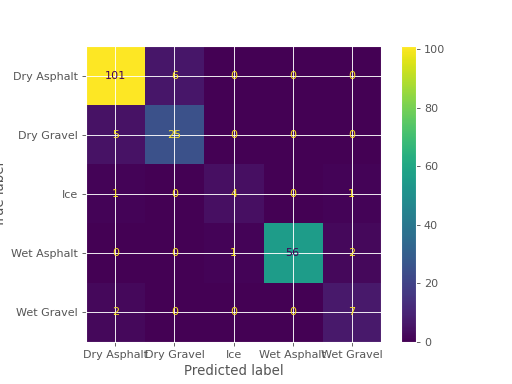

SVC confusion matrix


<IPython.core.display.Javascript object>


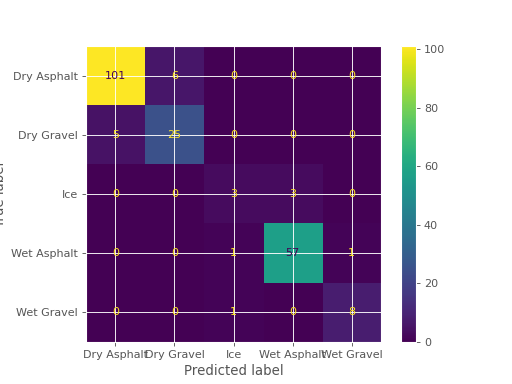

Decision tree classifier confusion matrix


<IPython.core.display.Javascript object>


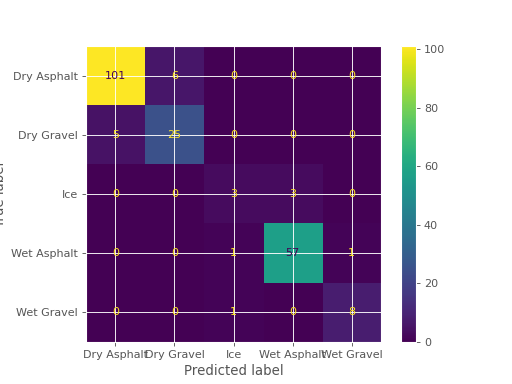

Random forest classifier confusion matrix


<IPython.core.display.Javascript object>


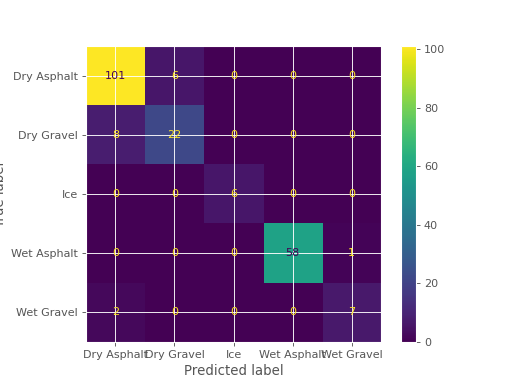

Extra trees classifier confusion matrix


<IPython.core.display.Javascript object>


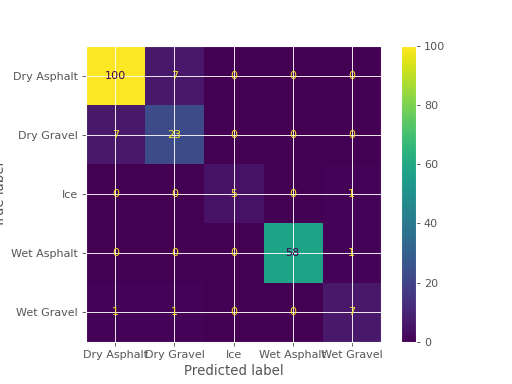

NaiveBayes classifier confusion matrix


<IPython.core.display.Javascript object>


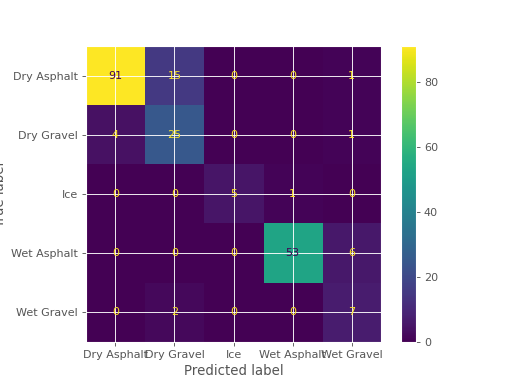

In [139]:
#%matplotlib inline

print("KNN confusion matrix")
plot_confusion_matrix(knn, x_test, y_test)
plt.show()


print("SVC confusion matrix")
plot_confusion_matrix(clf, x_test, y_test)
plt.show()

print("Decision tree classifier confusion matrix")
plot_confusion_matrix(treeclf, x_test, y_test)
plt.show()

print("Random forest classifier confusion matrix")
plot_confusion_matrix(rforestclf, x_test, y_test)
plt.show()

print("Extra trees classifier confusion matrix")
plot_confusion_matrix(forestclf, x_test, y_test)
plt.show()

print("NaiveBayes classifier confusion matrix")
plot_confusion_matrix(nbclf, x_test, y_test)
plt.show()

In [138]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print("Accuracy knn: ", np.round(accuracy_score(y_test, y_pred_knn),2))
print("Accuracy svc: ", np.round(accuracy_score(y_test, y_pred_svc),2))
print("Accuracy Tree : ", np.round(accuracy_score(y_test, y_pred_tree),2))
print("Accuracy Random forest : ", np.round(accuracy_score(y_test, y_pred_rforest),2))
print("Accuracy Extra Trees : ", np.round(accuracy_score(y_test, y_pred_forest),2))

print("----------")

print("Precision knn: ", np.round(precision_score(y_test, y_pred_knn, average='macro'),2))
print("Precision svc: ", np.round(precision_score(y_test, y_pred_svc, average = 'macro'),2))
print("Precision Tree: ", np.round(precision_score(y_test, y_pred_tree, average = 'macro'),2))
print("Precision Random Forest: ", np.round(precision_score(y_test, y_pred_rforest, average = 'macro'),2))
print("Precision trees: ", np.round(precision_score(y_test, y_pred_forest, average = 'macro'),2))

print("----------")

print("Recall knn: ", np.round(recall_score(y_test, y_pred_knn, average = 'macro'),2))
print("Recall svc: ", np.round(recall_score(y_test, y_pred_svc, average = 'macro'),2))     
print("Recall tree: ", np.round(recall_score(y_test, y_pred_tree, average = 'macro'),2))  
print("Recall forest: ", np.round(recall_score(y_test, y_pred_rforest, average = 'macro'),2))     
print("Recall trees: ", np.round(recall_score(y_test, y_pred_forest, average = 'macro'),2)) 

print("----------")
 
print("F1 knn: ", np.round(f1_score(y_test, y_pred_knn, average = 'macro'),2))
print("F1 svc: ", np.round(f1_score(y_test, y_pred_svc, average = 'macro'),2))            
print("F1 tree: ", np.round(f1_score(y_test, y_pred_tree, average = 'macro'),2))  
print("F1 forest: ", np.round(f1_score(y_test, y_pred_rforest, average = 'macro'),2))  

print("F1 trees: ", np.round(f1_score(y_test, y_pred_forest, average = 'macro'),2))  

Accuracy knn:  0.91
Accuracy svc:  0.92
Accuracy Tree :  0.92
Accuracy Random forest :  0.92
Accuracy Extra Trees :  0.91
----------
Precision knn:  0.85
Precision svc:  0.84
Precision Tree:  0.91
Precision Random Forest:  0.91
Precision trees:  0.89
----------
Recall knn:  0.83
Recall svc:  0.83
Recall tree:  0.89
Recall forest:  0.89
Recall trees:  0.86
----------
F1 knn:  0.84
F1 svc:  0.83
F1 tree:  0.9
F1 forest:  0.9
F1 trees:  0.87


### Machine learning with gravel, wet asphalt and dry asphalt. They all can clearly be recognized with multiple different ML methods. Accuracy is good, considering that some of the outliers are the ones that are predicted incorrectly. Dry asphalt and gravel are mixed together a little bit.

In [245]:
model = KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(model, X, y, scoring='accuracy', cv=LeaveOneOut(), n_jobs=-1)

print('Accuracy knn:', round(np.mean(scores)*100,1), '%')


model = sklearn.svm.SVC(kernel='linear') 
scores = cross_val_score(model, X, y, scoring='accuracy', cv=LeaveOneOut(), n_jobs=-1)

print('Accuracy svc:', round(np.mean(scores)*100,1), '%')


model = tree.DecisionTreeClassifier()
scores = cross_val_score(model, X, y, scoring='accuracy', cv=LeaveOneOut(), n_jobs=-1)
print('Accuracy tree:', round(np.mean(scores)*100,1), '%')


# model = RandomForestClassifier(n_estimators = 500)
# scores = cross_val_score(model, X, y, scoring='accuracy', cv=LeaveOneOut(), n_jobs=-1)
# print('Accuracy forest:', round(np.mean(scores)*100,1), '%')



# model = ExtraTreesClassifier(n_estimators = 500)
# scores = cross_val_score(model, X, y, scoring='accuracy', cv=LeaveOneOut(), n_jobs=-1)

# print('Accuracy extra trees:', round(np.mean(scores)*100,1), '%')

Accuracy knn: 98.0 %
Accuracy svc: 98.0 %
Accuracy tree: 94.1 %


In [126]:
X

RMS      RMSf      Spec     Specf        ZC       ZCf   Specslo  \
0    0.636991 -0.909537 -1.436763 -1.451934 -1.776822 -1.970302 -0.277799   
1    0.179694 -0.795452 -1.602796 -1.544345 -1.609772 -1.678002 -0.489709   
2    0.122326 -0.674255 -1.332246 -1.373932 -1.489207 -1.564362 -0.144402   
3   -0.159926 -0.517573 -1.604402 -1.497758 -1.640515 -1.721935 -0.491759   
4   -0.238222 -0.523400 -1.660792 -1.546567 -1.795157 -1.823078 -0.563729   
..        ...       ...       ...       ...       ...       ...       ...   
664  1.137249 -0.968632  0.498121  0.390345  1.020432  0.982384  0.129511   
665  0.614169 -0.435030  0.524241  0.449193  1.026914  0.950166  0.165181   
666 -0.593662  0.207291 -0.228514 -0.280964  0.435572  0.454602 -0.862822   
667 -0.641654  0.622580 -0.042689 -0.086110  0.765412  0.746903 -0.609049   
668 -0.600220  0.417660  0.113535  0.117241  1.032284  0.950752 -0.395702   

     Specslof   Specspr  Specsprf       STD      STDf  
0   -0.296562 -0.671288 -0.752975 -0.932151 -0.909537  
1   -0.406159 -1.160694 -1.059778 -0.775480 -0.795452  
2   -0.204052 -0.564559 -0.896966 -0.652589 -0.674255  
3   -0.350907 -1.145385 -0.828780 -0.448782 -0.517573  
4   -0.408794 -1.130075 -0.932176 -0.415016 -0.523400  
..        ...       ...       ...       ...       ...  
664 -0.006529  0.326647  0.353976 -1.040439 -0.968632  
665  0.068150  0.261300  0.276181 -0.497996 -0.435030  
666 -0.858418 -0.584690 -0.680135  0.225667  0.207291  
667 -0.611148 -0.694372 -0.673102  0.621277  0.622580  
668 -0.353097 -0.712116 -0.293775  0.351917  0.417660  

[554 rows x 12 columns]

In [127]:
features

['RMS',
 'RMSf',
 'Spec',
 'Specf',
 'ZC',
 'ZCf',
 'Specslo',
 'Specslof',
 'Specspr',
 'Specsprf',
 'STD',
 'STDf']

In [128]:
alldf

Surface       RMS      RMSf        ZC       ZCf      Spec     Specf  \
0    Wet Asphalt  0.636991 -0.909537 -1.776822 -1.970302 -1.436763 -1.451934   
1    Wet Asphalt  0.179694 -0.795452 -1.609772 -1.678002 -1.602796 -1.544345   
2    Wet Asphalt  0.122326 -0.674255 -1.489207 -1.564362 -1.332246 -1.373932   
3    Wet Asphalt -0.159926 -0.517573 -1.640515 -1.721935 -1.604402 -1.497758   
4    Wet Asphalt -0.238222 -0.523400 -1.795157 -1.823078 -1.660792 -1.546567   
..           ...       ...       ...       ...       ...       ...       ...   
664  Dry Asphalt  1.137249 -0.968632  1.020432  0.982384  0.498121  0.390345   
665  Dry Asphalt  0.614169 -0.435030  1.026914  0.950166  0.524241  0.449193   
666  Dry Asphalt -0.593662  0.207291  0.435572  0.454602 -0.228514 -0.280964   
667  Dry Asphalt -0.641654  0.622580  0.765412  0.746903 -0.042689 -0.086110   
668  Dry Asphalt -0.600220  0.417660  1.032284  0.950752  0.113535  0.117241   

      Specslo  Specslof   Specspr  Specsprf       STD      STDf  
0   -0.277799 -0.296562 -0.671288 -0.752975 -0.932151 -0.909537  
1   -0.489709 -0.406159 -1.160694 -1.059778 -0.775480 -0.795452  
2   -0.144402 -0.204052 -0.564559 -0.896966 -0.652589 -0.674255  
3   -0.491759 -0.350907 -1.145385 -0.828780 -0.448782 -0.517573  
4   -0.563729 -0.408794 -1.130075 -0.932176 -0.415016 -0.523400  
..        ...       ...       ...       ...       ...       ...  
664  0.129511 -0.006529  0.326647  0.353976 -1.040439 -0.968632  
665  0.165181  0.068150  0.261300  0.276181 -0.497996 -0.435030  
666 -0.862822 -0.858418 -0.584690 -0.680135  0.225667  0.207291  
667 -0.609049 -0.611148 -0.694372 -0.673102  0.621277  0.622580  
668 -0.395702 -0.353097 -0.712116 -0.293775  0.351917  0.417660  

[554 rows x 13 columns]

## Unsupervised ML

<IPython.core.display.Javascript object>


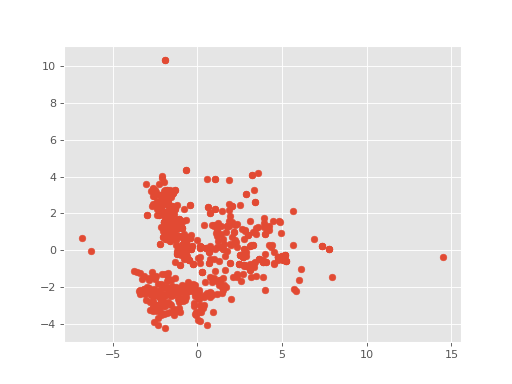

In [140]:
# Import whatever libraries, modules, etc. you may need here.

import scipy as sp
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score

X =  alldf[features]
Y = alldf["Surface"]

X = X.apply(sp.stats.zscore) # z-standardization


#PCA
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)
plt.figure()
plt.scatter(X_r[:,0],X_r[:,1])
plt.show()

In [141]:
Y

0     Wet Asphalt
1     Wet Asphalt
2     Wet Asphalt
3     Wet Asphalt
4     Wet Asphalt
         ...     
46    Wet Asphalt
47    Wet Asphalt
48    Wet Asphalt
49    Wet Asphalt
50    Wet Asphalt
Name: Surface, Length: 638, dtype: object

In [142]:
Y = pd.factorize(Y)[0]

<IPython.core.display.Javascript object>


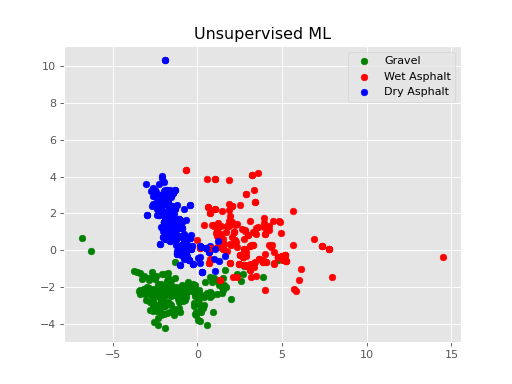

<IPython.core.display.Javascript object>


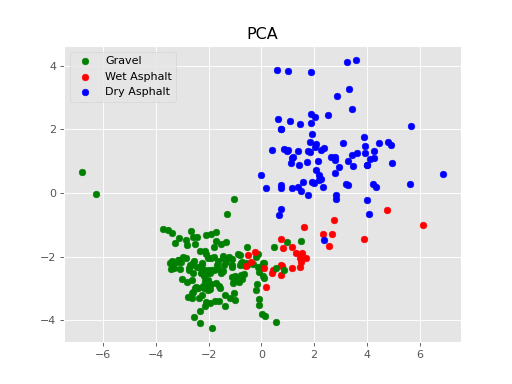

Rand score: 0.5765555567375769


In [143]:


# clustering with ward method
clustering = AgglomerativeClustering(n_clusters=3, linkage='ward').fit(X)
clustering_labels = clustering.labels_

# PCA
pca=PCA(n_components=3)
X_r = pca.fit_transform(X)


plt.figure()
# plot the predicted clusters 
for i in range(len(clustering_labels)):
    labels = list(set(clustering_labels))
    if clustering_labels[i] == labels[2]:
        plt.scatter(X_r[i,0],X_r[i,1], color='g', label="Gravel")
        
    if clustering_labels[i] == labels[0]:
        plt.scatter(X_r[i,0],X_r[i,1], color='r', label="Wet Asphalt")
    if clustering_labels[i] == labels[1]:
        plt.scatter(X_r[i,0],X_r[i,1], color='b', label="Dry Asphalt")

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.title("Unsupervised ML")
plt.show()

plt.figure()
# plot the correct types
for i in range(len(Y)):
    labels = list(set(Y))
    if Y[i] == labels[0]:
        plt.scatter(X_r[i,0],X_r[i,1], color='g', label="Gravel")
    if Y[i] == labels[1]:
        plt.scatter(X_r[i,0],X_r[i,1], color='r', label="Wet Asphalt")
    if Y[i] == labels[2]:
        plt.scatter(X_r[i,0],X_r[i,1], color='b', label="Dry Asphalt")
        
plt.title("PCA")
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.show()

rand = adjusted_rand_score(Y, clustering_labels)
print('Rand score:', rand)


# Machine learning for only asphalt recordings

### These should be recorded at fairly similar speeds.

In [145]:
waspdf2["Surface"] = "WA2"

waspdf2

Surface                        ID        RMS      RMS_filt  Zero-Cross  \
0      WA2  2022_14_44_14-Jan-13.wav  19.868353   1761.138213     10164.0   
1      WA2  2022_14_44_24-Jan-13.wav  17.254955   2035.841568     10025.0   
2      WA2  2022_14_44_35-Jan-13.wav  16.814893   2076.510367      9112.0   
3      WA2  2022_14_44_45-Jan-13.wav  16.944965   2066.260508      9217.0   
4      WA2  2022_14_44_55-Jan-13.wav  16.604110   2289.283013      9766.0   
5      WA2  2022_14_45_05-Jan-13.wav  14.825308   2190.986856      9979.0   
6      WA2  2022_14_45_15-Jan-13.wav  17.038128   2189.927366      9834.0   
7      WA2  2022_14_45_26-Jan-13.wav  15.502651   2280.766751     10070.0   
8      WA2  2022_14_45_36-Jan-13.wav  17.028682   2233.659746     10093.0   
9      WA2  2022_14_45_46-Jan-13.wav        NaN  10288.681596      5824.0   
10     WA2  2022_14_45_56-Jan-13.wav        NaN   9743.687948      5477.0   
11     WA2  2022_14_46_06-Jan-13.wav   0.474524   8211.086852      5676.0   
12     WA2  2022_14_46_17-Jan-13.wav        NaN   9523.871431      5767.0   
13     WA2  2022_14_46_27-Jan-13.wav        NaN   9443.003731      5349.0   
14     WA2  2022_14_46_37-Jan-13.wav        NaN   9086.455515      5545.0   
15     WA2  2022_14_46_47-Jan-13.wav        NaN   8517.722631      5762.0   
16     WA2  2022_14_46_57-Jan-13.wav   6.910680   7234.603896      5983.0   
17     WA2  2022_14_47_07-Jan-13.wav  20.744088   1636.325934      9020.0   
18     WA2  2022_14_47_18-Jan-13.wav  27.779183   1071.077594      9817.0   
19     WA2  2022_14_47_28-Jan-13.wav  37.311860    684.693485      8659.0   
20     WA2  2022_14_47_38-Jan-13.wav  31.566320    836.682515     10386.0   
21     WA2  2022_14_47_48-Jan-13.wav  28.667072    959.435102      9677.0   
22     WA2  2022_14_47_58-Jan-13.wav  27.093964   1076.909020     10072.0   
23     WA2  2022_14_48_09-Jan-13.wav  26.688786   1017.629342      9600.0   
24     WA2  2022_14_48_19-Jan-13.wav  26.292896   1107.193026     10085.0   
25     WA2  2022_14_48_29-Jan-13.wav  30.111652    910.913318     10092.0   
26     WA2  2022_14_48_39-Jan-13.wav  58.002563    334.734678      9092.0   
27     WA2  2022_14_48_49-Jan-13.wav  55.229747    264.411782      8128.0   
28     WA2  2022_14_49_00-Jan-13.wav  33.755041    653.256155      9693.0   
29     WA2  2022_14_49_10-Jan-13.wav  30.074151    832.245989      9278.0   
30     WA2  2022_14_49_20-Jan-13.wav  28.936220    919.124639      9468.0   
31     WA2  2022_15_00_45-Jan-13.wav  44.962119    412.827105     10994.0   
32     WA2  2022_15_00_55-Jan-13.wav  41.186323    476.595254     11564.0   
33     WA2  2022_15_01_05-Jan-13.wav  40.335747    479.506385     11331.0   
34     WA2  2022_15_01_15-Jan-13.wav  38.906022    509.437326     11224.0   
35     WA2  2022_15_01_26-Jan-13.wav  38.398235    536.000730     10801.0   
36     WA2  2022_15_01_36-Jan-13.wav  31.278557    909.155444     11488.0   
37     WA2  2022_15_01_46-Jan-13.wav  29.302412    894.883914     11339.0   
38     WA2  2022_15_01_56-Jan-13.wav  28.817549    974.214105     11180.0   
39     WA2  2022_15_02_06-Jan-13.wav  27.609070    996.550720     11154.0   
40     WA2  2022_15_02_17-Jan-13.wav  28.305091    961.182367     11352.0   
41     WA2  2022_15_02_27-Jan-13.wav  28.343001    961.037995     11115.0   
42     WA2  2022_15_02_37-Jan-13.wav  28.371234    988.810958     11138.0   
43     WA2  2022_15_02_47-Jan-13.wav  29.673804    936.057756     11702.0   
44     WA2  2022_15_02_57-Jan-13.wav  28.666365    955.112735     11360.0   
45     WA2  2022_15_03_08-Jan-13.wav  29.856172    935.064100     11671.0   
46     WA2  2022_15_03_18-Jan-13.wav  32.955746    760.687234     11694.0   
47     WA2  2022_15_03_28-Jan-13.wav  34.228158    694.623322     12092.0   
48     WA2  2022_15_03_38-Jan-13.wav  35.031203    674.327265     11464.0   
49     WA2  2022_15_03_48-Jan-13.wav  35.212853    645.189176     12318.0   
50     WA2  2022_15_03_59-Jan-13.wav  34.046752    689.591627     12645.0   

In [155]:
aspdf = pd.concat([waspdf, waspdf2])

aspdf = aspdf.dropna()

X = aspdf[features]
y = aspdf["Surface"]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, shuffle=True, stratify=None)

# KNN

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

y_pred_knn = knn.predict(x_test)



# Extra trees classifier

forestclf = ExtraTreesClassifier(n_estimators = 500)

forestclf.fit(x_train, y_train)

y_pred_forest = forestclf.predict(x_test)


# SVC

#Create a svm Classifier
clf = sklearn.svm.SVC(kernel='linear') 

#Train the model using the training sets
clf.fit(x_train, y_train)

#Predict the response for test dataset
y_pred_svc = clf.predict(x_test)


# Random Forest

rforestclf = RandomForestClassifier(n_estimators = 500)

rforestclf.fit(x_train, y_train)

y_pred_rforest = rforestclf.predict(x_test)


# Decision tree

treeclf = tree.DecisionTreeClassifier()
treeclf = clf.fit(x_train, y_train)
y_pred_tree = rforestclf.predict(x_test)

# Naive bayes

gnb = GaussianNB()
nbclf = gnb.fit(x_train, y_train)
y_pred_nb = nbclf.predict(x_test)

KNN confusion matrix


<IPython.core.display.Javascript object>


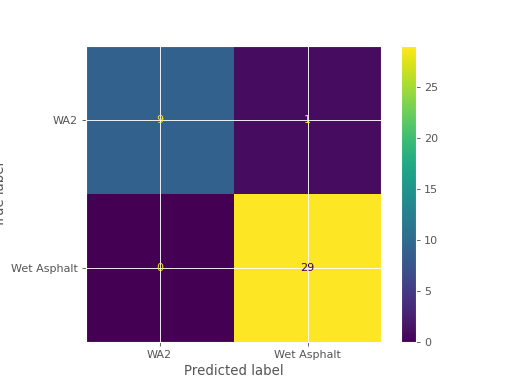

SVC confusion matrix


<IPython.core.display.Javascript object>


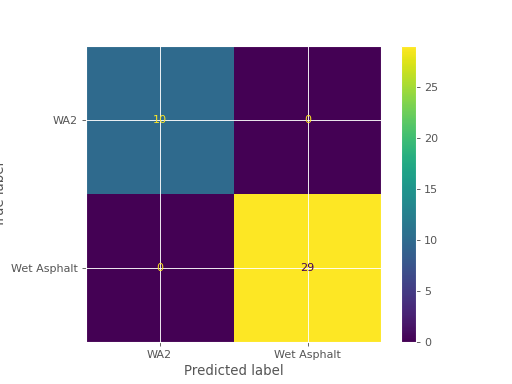

Decision tree classifier confusion matrix


<IPython.core.display.Javascript object>


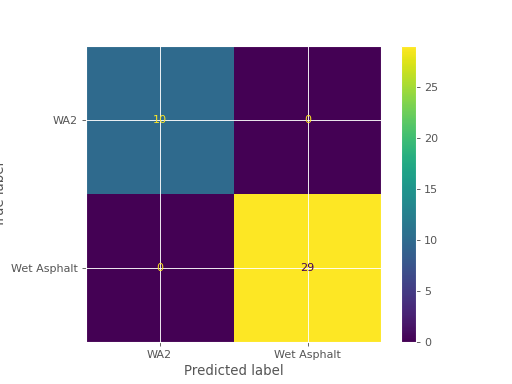

Random forest classifier confusion matrix


C:\Users\Owner\anaconda3\lib\site-packages\sklearn\metrics\_plot\confusion_matrix.py:81: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


<IPython.core.display.Javascript object>


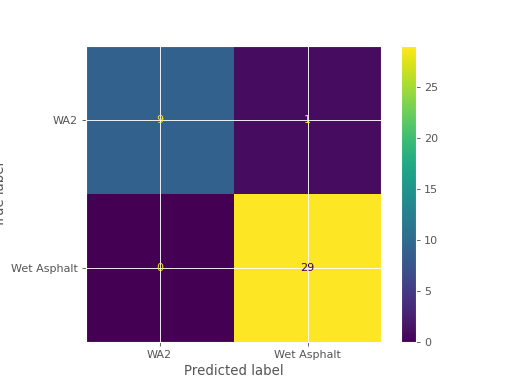

Extra trees classifier confusion matrix


C:\Users\Owner\anaconda3\lib\site-packages\sklearn\metrics\_plot\confusion_matrix.py:81: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


<IPython.core.display.Javascript object>


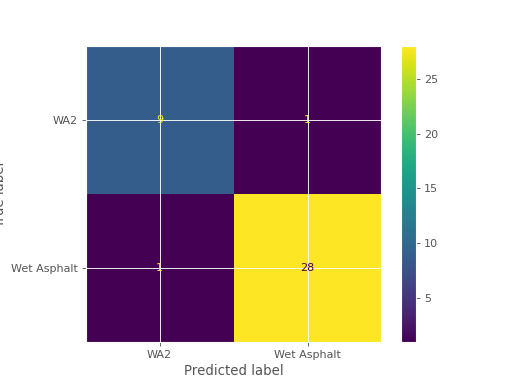

NaiveBayes classifier confusion matrix


C:\Users\Owner\anaconda3\lib\site-packages\sklearn\metrics\_plot\confusion_matrix.py:81: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


<IPython.core.display.Javascript object>


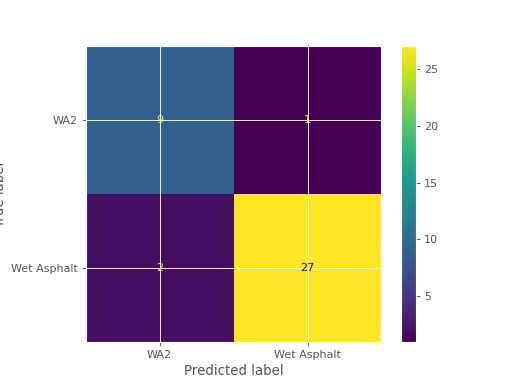

In [156]:
#%matplotlib inline

print("KNN confusion matrix")
plot_confusion_matrix(knn, x_test, y_test)
plt.show()


print("SVC confusion matrix")
plot_confusion_matrix(clf, x_test, y_test)
plt.show()

print("Decision tree classifier confusion matrix")
plot_confusion_matrix(treeclf, x_test, y_test)
plt.show()

print("Random forest classifier confusion matrix")
plot_confusion_matrix(rforestclf, x_test, y_test)
plt.show()

print("Extra trees classifier confusion matrix")
plot_confusion_matrix(forestclf, x_test, y_test)
plt.show()

print("NaiveBayes classifier confusion matrix")
plot_confusion_matrix(nbclf, x_test, y_test)
plt.show()

<ipython-input-154-a182e0e80549>:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<IPython.core.display.Javascript object>


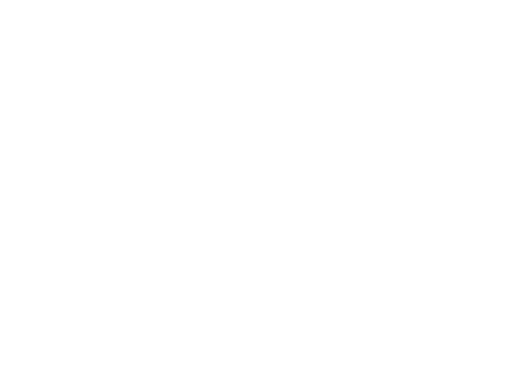

C:\Users\Owner\anaconda3\lib\site-packages\seaborn\axisgrid.py:1287: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(len(y_vars), len(x_vars),


<IPython.core.display.Javascript object>


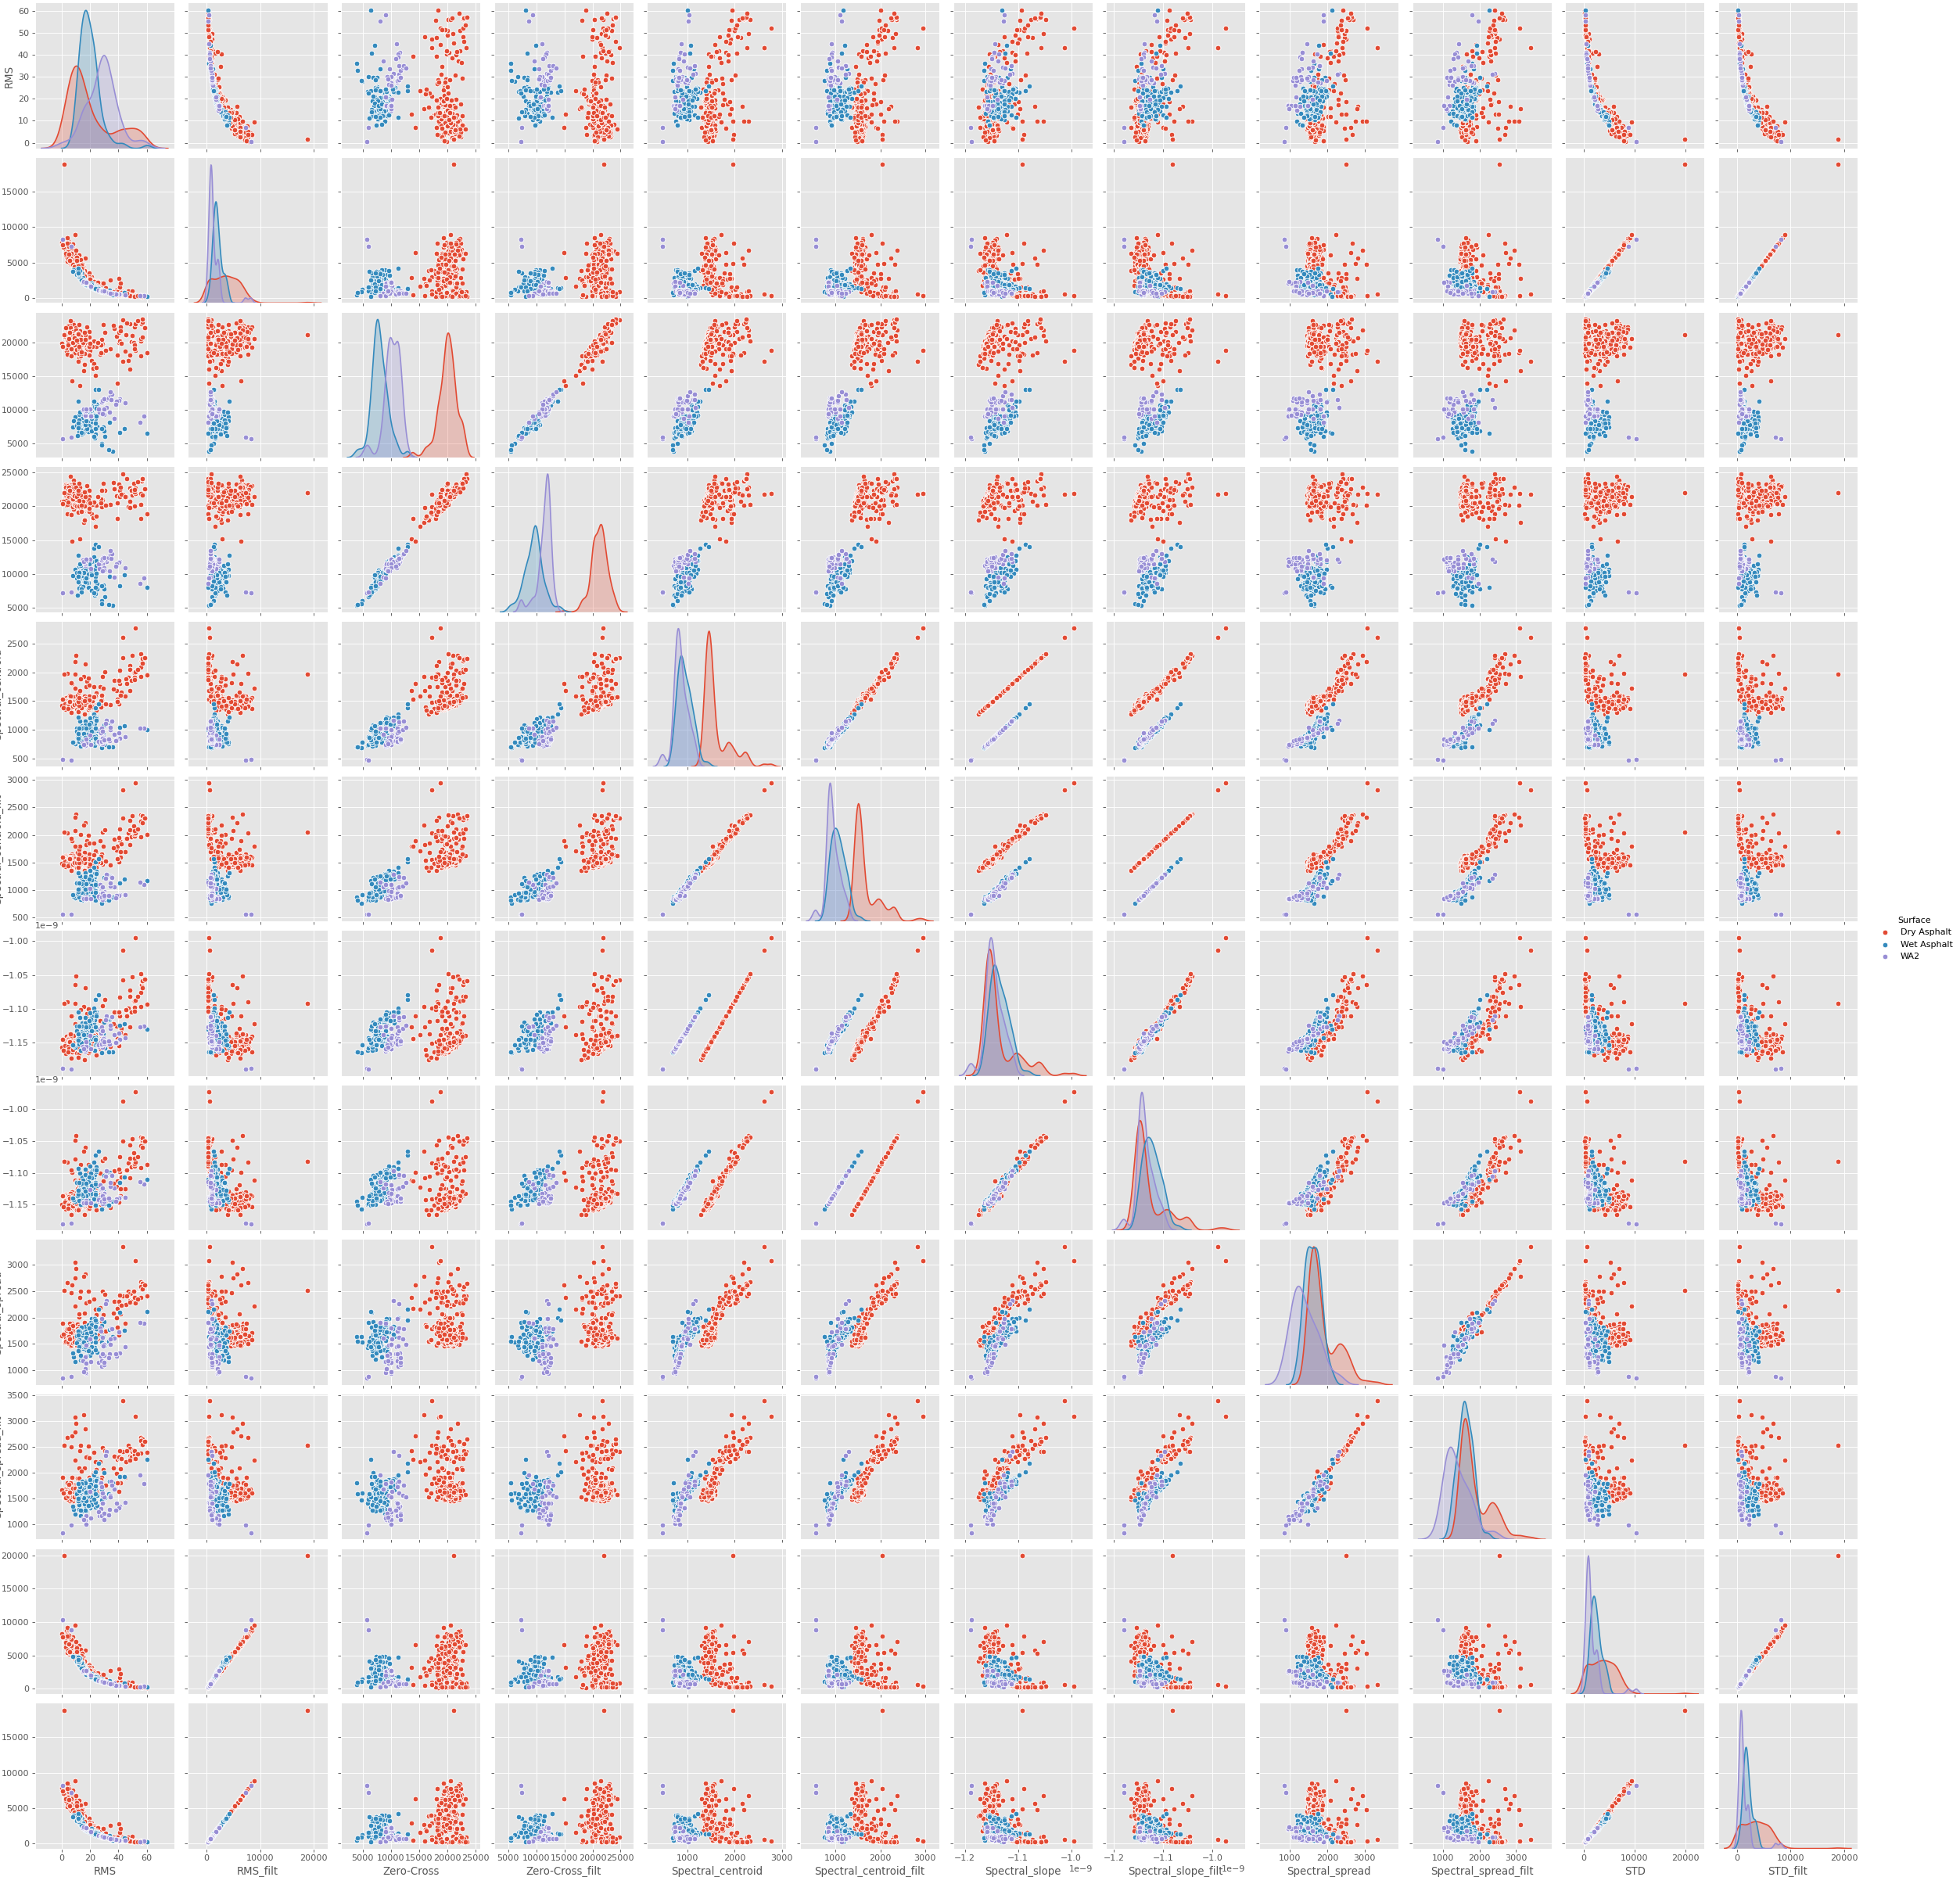

In [154]:
plt.figure()
sns.pairplot(aspdf, hue='Surface')

<ipython-input-157-a5f9c157d945>:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<IPython.core.display.Javascript object>


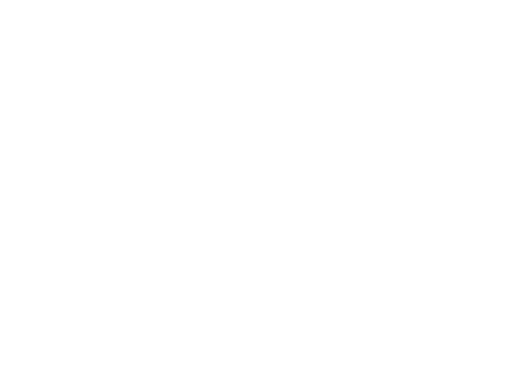

C:\Users\Owner\anaconda3\lib\site-packages\seaborn\axisgrid.py:1287: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(len(y_vars), len(x_vars),


<IPython.core.display.Javascript object>


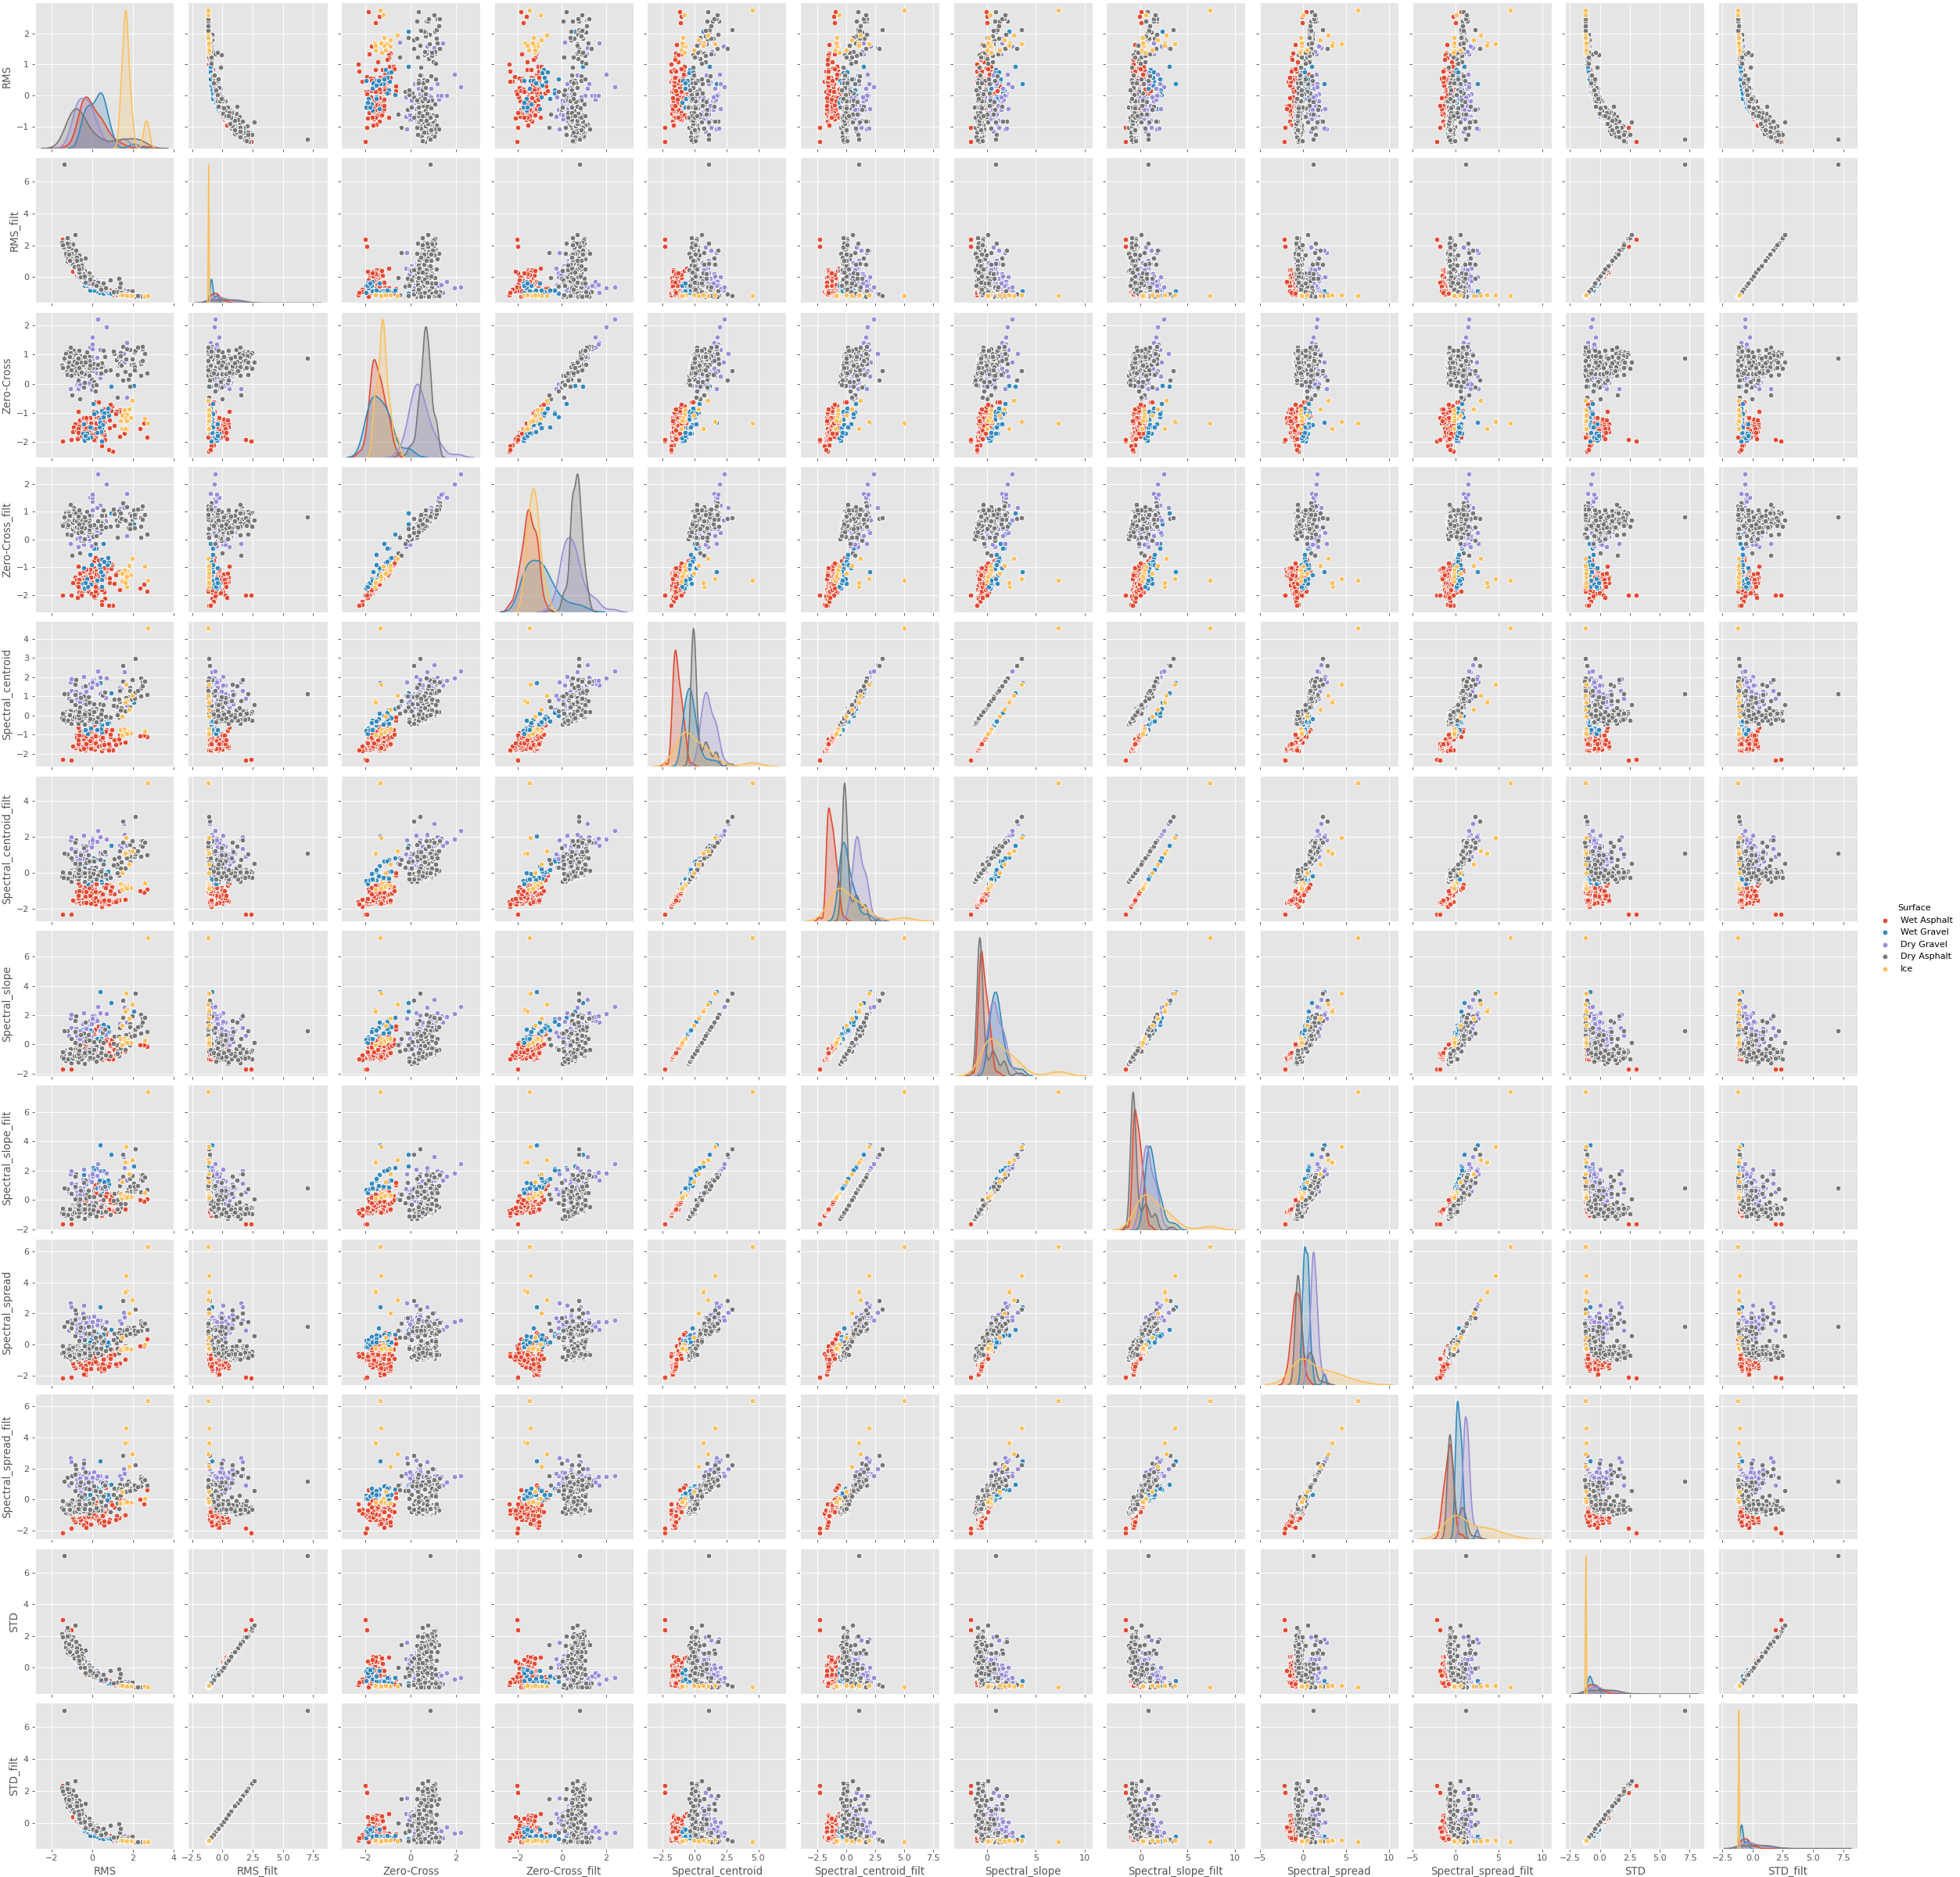

In [157]:
plt.figure()
sns.pairplot(alldf, hue='Surface')